# Import Library

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load Data

In [171]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\hp\Desktop\Truedigital\material\dsi-mymaterial\Projects\project_2\code


In [172]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

In [173]:
subdist_df = pd.read_csv('../data/dist_subdist_replacement.csv')

In [174]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


Train data shape :**14271 rows × 23 columns**

In [175]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


Test data shape : **2500 rows × 22 columns**

In [176]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [177]:
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [178]:
# Search for '_what_' in all columns
search_value = '_what_'
result = train_df.apply(lambda col: col.str.contains(search_value, case=False, na=False), axis=1).any()
print(result)

id                         False
province                   False
district                   False
subdistrict                False
address                    False
property_type              False
total_units                False
bedrooms                   False
baths                      False
floor_area                 False
floor_level                False
land_area                  False
latitude                   False
longitude                  False
nearby_stations            False
nearby_station_distance    False
nearby_bus_stops           False
nearby_supermarkets        False
nearby_shops               False
year_built                 False
month_built                False
facilities                 False
price                      False
dtype: bool


In [179]:
# Search for '_what_' in all columns
search_value = '_what_'
result = test_df.apply(lambda col: col.str.contains(search_value, case=False, na=False), axis=1).any()
print(result)

id                         False
province                   False
district                   False
subdistrict                False
address                    False
property_type              False
total_units                False
bedrooms                   False
baths                      False
floor_area                 False
floor_level                False
land_area                  False
latitude                   False
longitude                  False
nearby_stations            False
nearby_station_distance    False
nearby_bus_stops           False
nearby_supermarkets        False
nearby_shops               False
year_built                 False
month_built                False
facilities                 False
dtype: bool


In [180]:
train_df['subdistrict'].unique()
train_df['subdistrict']

0        Phra Khanong Nuea
1         Khlong Toei Nuea
2               Khlong Tan
3           Bang Khun Kong
4                Bang Phai
               ...        
14266           Bang Kraso
14267           Phimon Rat
14268          Saphan Sung
14269            Sanam Bin
14270       Khlong Ton Sai
Name: subdistrict, Length: 14271, dtype: object

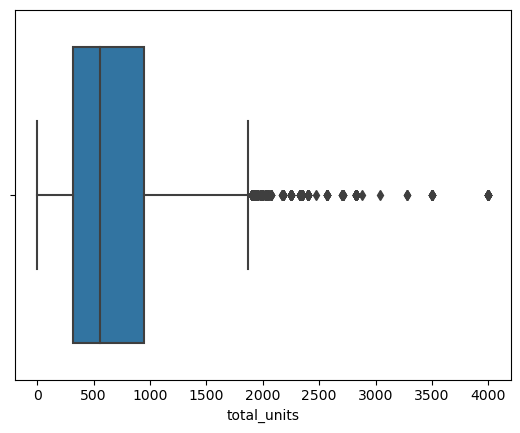

In [181]:
sns.boxplot(data=train_df, x='total_units')


# Show the plot
plt.show()

In [182]:
Q1 = train_df['total_units'].quantile(0.25)
Q3 = train_df['total_units'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (train_df['total_units'] < lower_bound) | (train_df['total_units'] > upper_bound)
outlier_values = train_df['total_units'][outliers]
print(Q1)
print(Q3)
print(lower_bound)
print(upper_bound)
print(outliers)
print(outlier_values)

318.0
945.0
-622.5
1885.5
0        False
1        False
2        False
3        False
4        False
         ...  
14266    False
14267    False
14268    False
14269    False
14270    False
Name: total_units, Length: 14271, dtype: bool
21       1932.0
35       2568.0
45       1911.0
77       2824.0
128      2351.0
          ...  
14013    2351.0
14035    1908.0
14084    2177.0
14160    2330.0
14233    1911.0
Name: total_units, Length: 449, dtype: float64


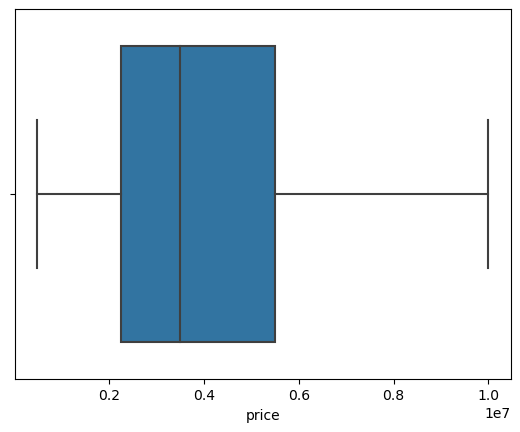

In [183]:
sns.boxplot(data=train_df, x='price')

# Show the plot
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


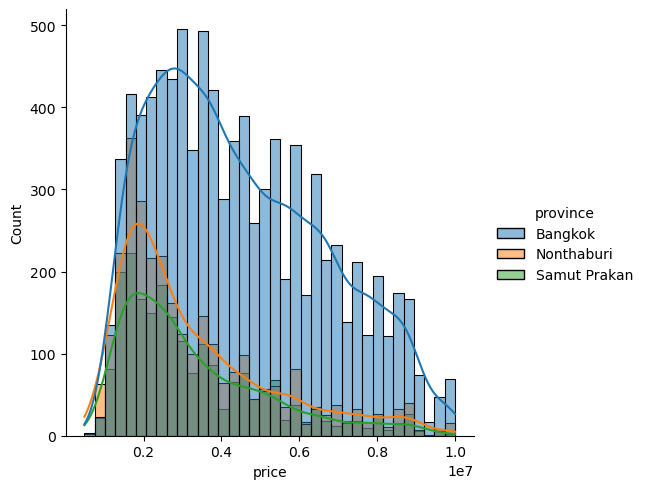

In [184]:
sns.displot(x="price", hue='province', kde=True, data=train_df);

# Data Cleaning

## Miss value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

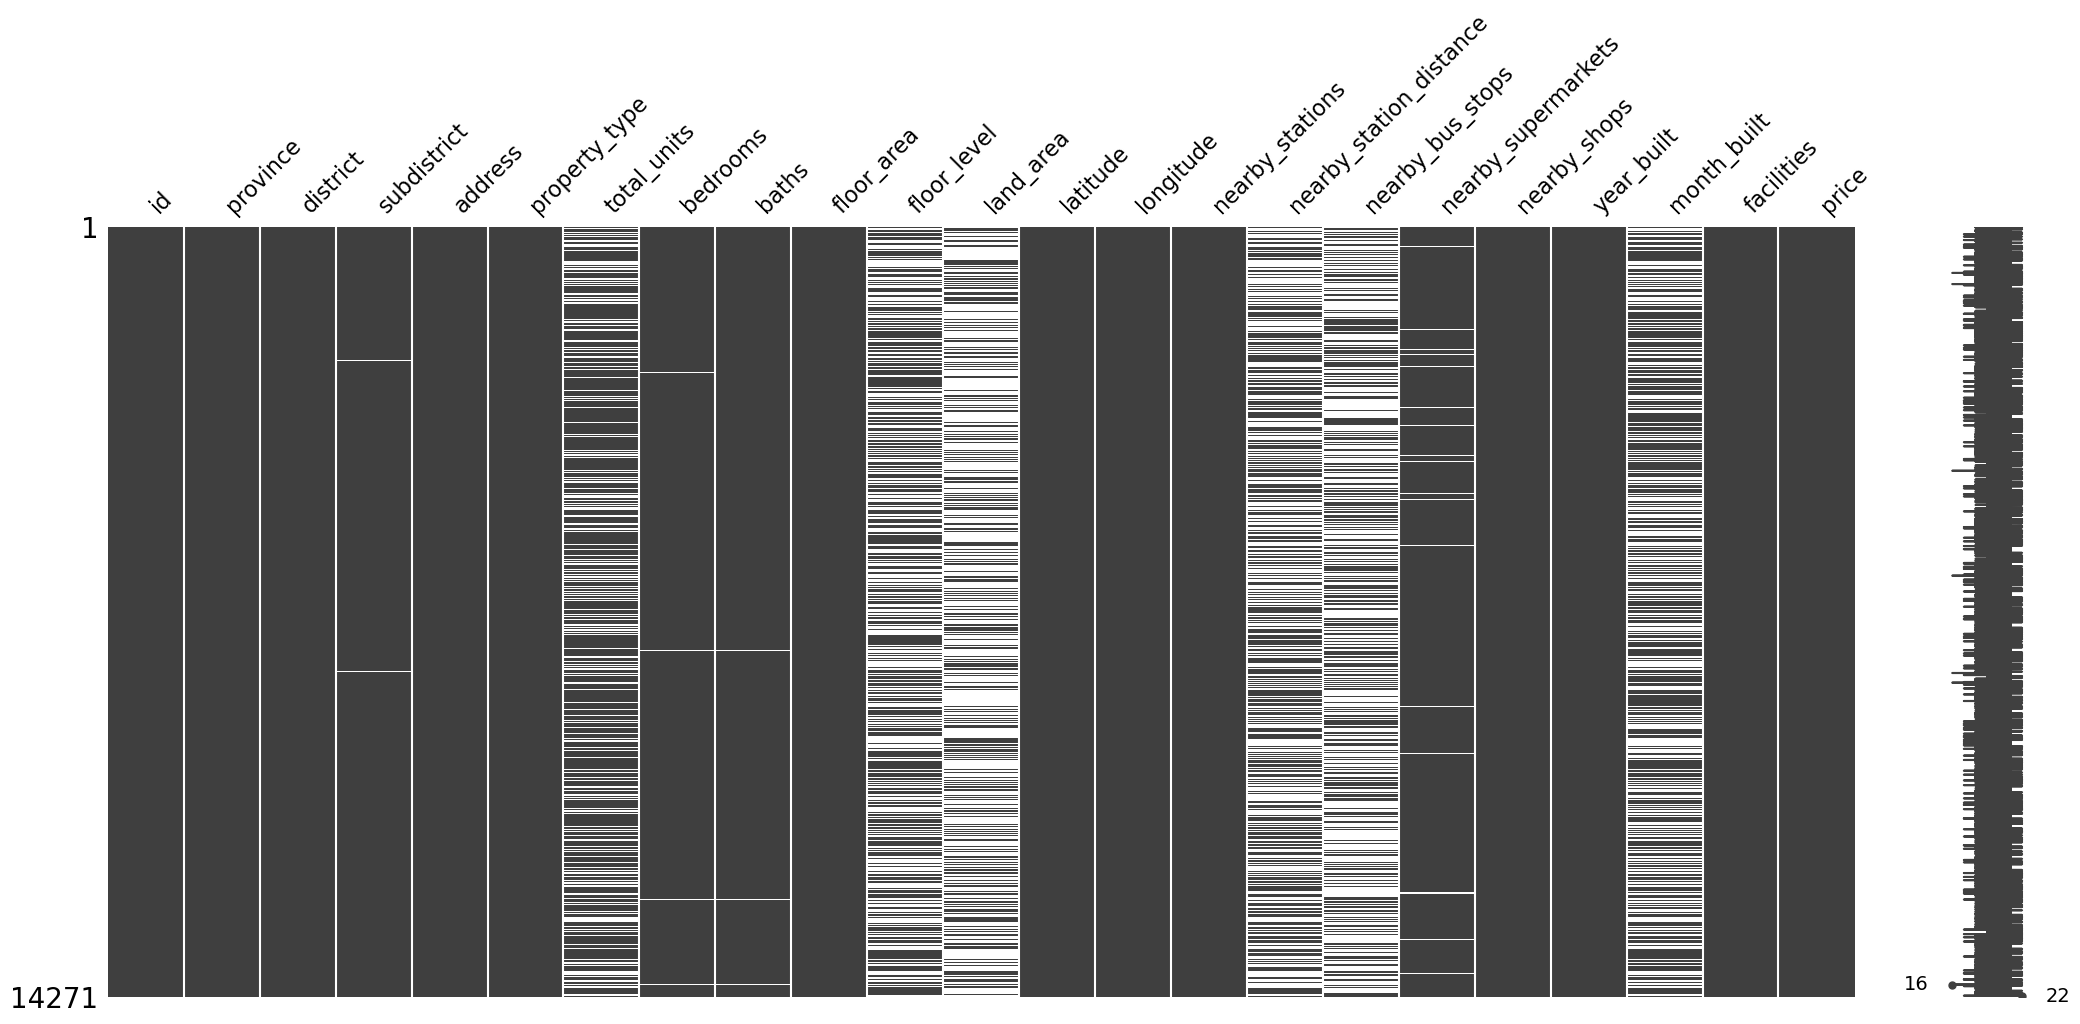

In [185]:
train_df.info()
msno.matrix(train_df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2500 non-null   int64  
 1   province                 2500 non-null   object 
 2   district                 2500 non-null   object 
 3   subdistrict              2497 non-null   object 
 4   address                  2500 non-null   object 
 5   property_type            2500 non-null   object 
 6   total_units              1858 non-null   float64
 7   bedrooms                 2490 non-null   float64
 8   baths                    2490 non-null   float64
 9   floor_area               2500 non-null   int64  
 10  floor_level              1401 non-null   float64
 11  land_area                841 non-null    float64
 12  latitude                 2500 non-null   float64
 13  longitude                2500 non-null   float64
 14  nearby_stations         

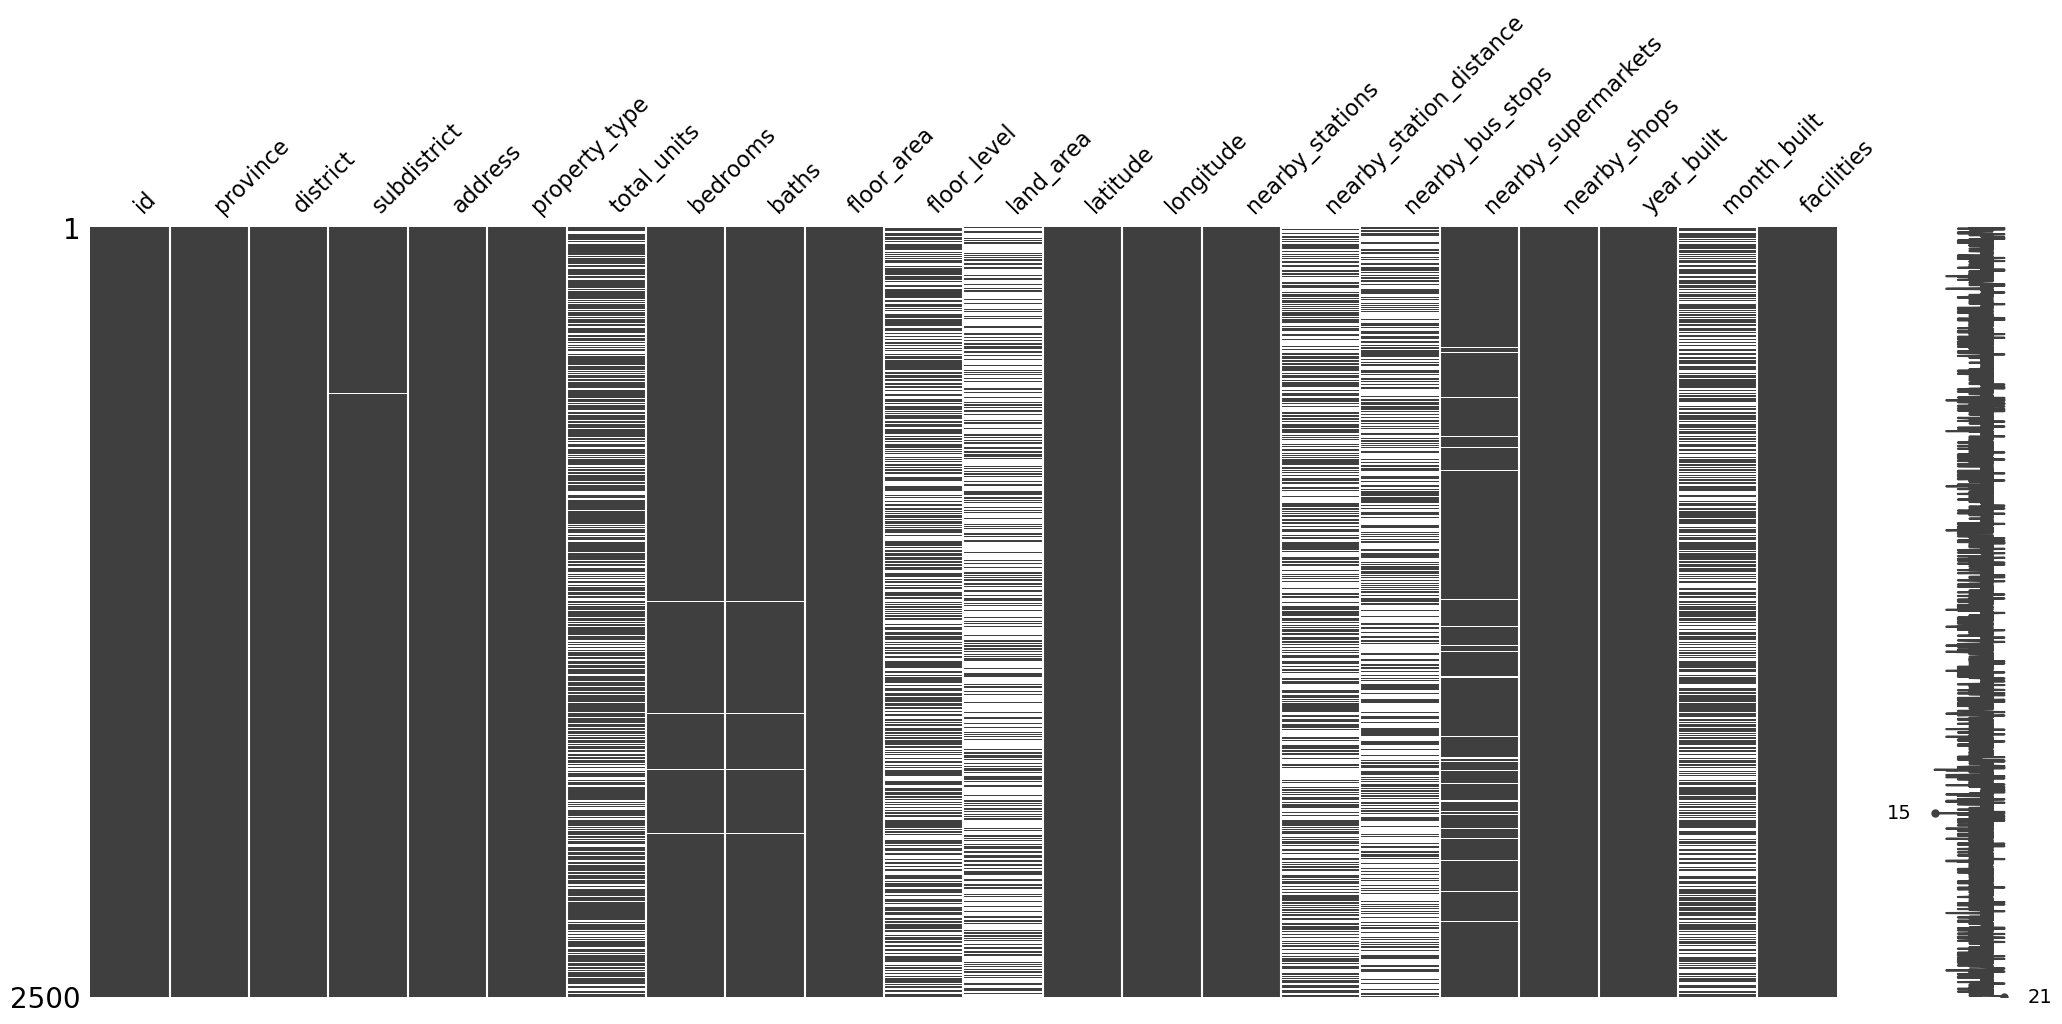

In [186]:
test_df.info()
msno.matrix(test_df);

In [187]:
train_df['total_units'].unique()
train_df['total_units']

0        273.0
1         74.0
2        940.0
3          NaN
4          NaN
         ...  
14266    648.0
14267      NaN
14268    300.0
14269      NaN
14270    365.0
Name: total_units, Length: 14271, dtype: float64

In [188]:
train_df['total_units'].interpolate(method='linear', inplace=True)

In [189]:
test_df['total_units'].interpolate(method='linear', inplace=True)

In [190]:
train_df['total_units']

0        273.0
1         74.0
2        940.0
3        697.0
4        454.0
         ...  
14266    648.0
14267    474.0
14268    300.0
14269    332.5
14270    365.0
Name: total_units, Length: 14271, dtype: float64

In [191]:
train_df['district'].head()

0             Watthana
1             Watthana
2          Khlong Toei
3           Bang Kruai
4    Mueang Nonthaburi
Name: district, dtype: object

In [192]:
test_df['total_units']

0        800.0
1        107.0
2        433.0
3        656.0
4       1458.0
         ...  
2495    1598.0
2496     493.0
2497    1121.0
2498     719.0
2499    1004.0
Name: total_units, Length: 2500, dtype: float64

<Axes: xlabel='bedrooms'>

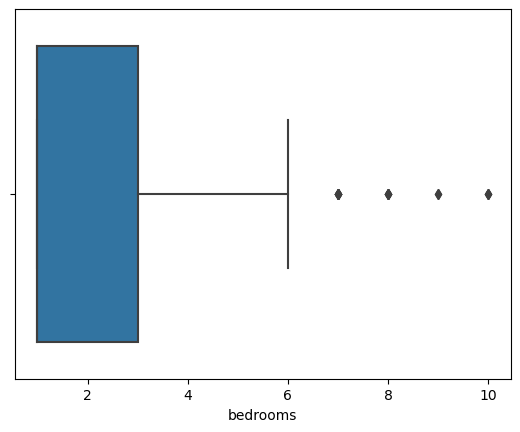

In [193]:
sns.boxplot(data=train_df, x='bedrooms')

In [194]:
train_df['bedrooms']

0        2.0
1        1.0
2        1.0
3        3.0
4        3.0
        ... 
14266    2.0
14267    3.0
14268    3.0
14269    2.0
14270    1.0
Name: bedrooms, Length: 14271, dtype: float64

In [195]:
train_df['bedrooms'].fillna(train_df['bedrooms'].mean(), inplace=True)

In [196]:
train_df['bedrooms'].isnull().sum()

0

In [197]:
test_df['bedrooms'].fillna(test_df['bedrooms'].mean(), inplace=True)

In [198]:
test_df['bedrooms'].isnull().sum()

0

In [199]:
train_df['baths'].isnull().sum()

35

In [200]:
train_df['baths'].fillna(train_df['baths'].mean(), inplace=True)

In [201]:
train_df['baths'].isnull().sum()

0

In [202]:
test_df['baths'].isnull().sum()

10

In [203]:
test_df['baths'].fillna(test_df['baths'].mean(), inplace=True)

In [204]:
test_df['baths'].isnull().sum()

0

In [205]:
train_df['floor_level'].isnull().sum()

6178

In [206]:
train_df['floor_level'].unique()

array([10.,  8.,  4., nan,  6., 12., 11.,  2., 24.,  5., 16., 14., 18.,
       15., 21., 39.,  3., 32., 17.,  7., 25., 29., 26., 22.,  9., 31.,
       46., 20., 19., 27.,  1., 13., 30., 23., 28., 33., 37., 40., 36.,
       55., 35., 51., 49., 34., 41., 38., 47., 43., 45., 44., 42., 52.])

In [207]:
train_df['floor_level'].dtype

dtype('float64')

<Axes: xlabel='floor_level'>

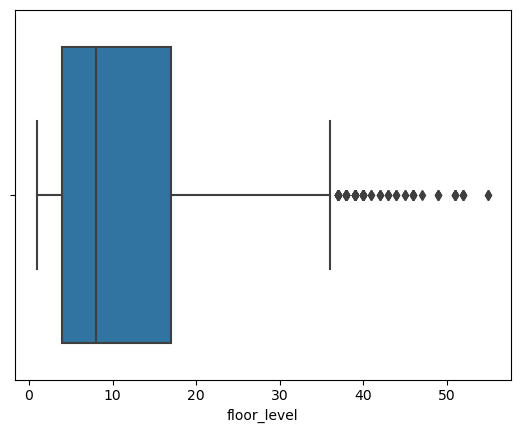

In [208]:
sns.boxplot(data=train_df, x='floor_level')

In [209]:
train_df['floor_level'] = train_df['floor_level'].fillna(0).astype(int)

In [210]:
test_df['floor_level'] = test_df['floor_level'].fillna(0).astype(int)

In [211]:
train_df['floor_level'].unique()

array([10,  8,  4,  0,  6, 12, 11,  2, 24,  5, 16, 14, 18, 15, 21, 39,  3,
       32, 17,  7, 25, 29, 26, 22,  9, 31, 46, 20, 19, 27,  1, 13, 30, 23,
       28, 33, 37, 40, 36, 55, 35, 51, 49, 34, 41, 38, 47, 43, 45, 44, 42,
       52])

In [212]:
test_df['floor_level'].unique()

array([ 0, 23,  5, 25,  6, 24, 30, 16,  4, 31, 22,  2, 12,  8,  9, 15, 11,
        1,  7, 28, 10, 14, 18, 13, 19,  3, 17, 21, 35, 44, 20, 38, 32, 27,
       33, 26, 29, 40, 46, 42, 49, 34, 37, 36])

In [213]:
train_df['floor_level'].isnull().sum()

0

In [214]:
test_df['floor_level'].isnull().sum()

0

<Axes: xlabel='land_area'>

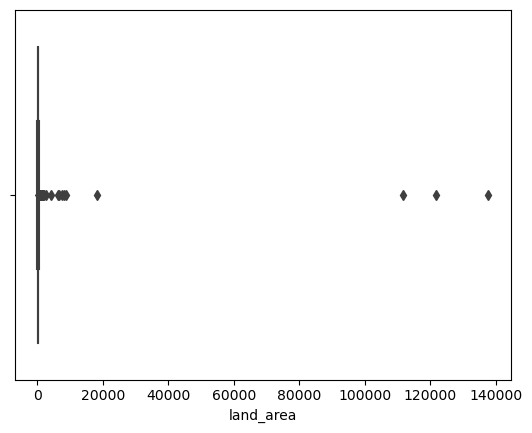

In [215]:
sns.boxplot(data=train_df, x='land_area')

In [216]:
train_df['land_area'].head()

0      NaN
1      NaN
2      NaN
3    248.0
4     72.0
Name: land_area, dtype: float64

In [217]:
train_df['land_area'].isnull().sum()

9354

In [218]:
train_df['land_area'].interpolate(method='linear', inplace=True)

In [219]:
train_df['land_area'].head()

0      NaN
1      NaN
2      NaN
3    248.0
4     72.0
Name: land_area, dtype: float64

In [220]:
train_df['land_area'].isnull().sum()

3

In [221]:
train_df['district'].head()

0             Watthana
1             Watthana
2          Khlong Toei
3           Bang Kruai
4    Mueang Nonthaburi
Name: district, dtype: object

In [222]:
# Fill first three rows
train_df.iloc[:3] = train_df.iloc[:3].fillna(train_df.mean(numeric_only=True)).round()

In [223]:
train_df['district'].head()

0             Watthana
1             Watthana
2          Khlong Toei
3           Bang Kruai
4    Mueang Nonthaburi
Name: district, dtype: object

In [224]:
train_df['land_area'].tail(30)

14241     76.000000
14242     72.000000
14243    140.000000
14244    208.000000
14245     80.000000
14246    132.000000
14247    184.000000
14248    236.000000
14249    214.285714
14250    192.571429
14251    170.857143
14252    149.142857
14253    127.428571
14254    105.714286
14255     84.000000
14256     84.000000
14257     84.000000
14258     96.000000
14259    108.000000
14260    120.000000
14261    132.000000
14262    144.000000
14263    256.000000
14264    224.000000
14265    173.333333
14266    122.666667
14267     72.000000
14268    260.000000
14269    100.000000
14270    100.000000
Name: land_area, dtype: float64

In [225]:
train_df['land_area'] = train_df['land_area'].round()

In [226]:
train_df['land_area'].tail(30)

14241     76.0
14242     72.0
14243    140.0
14244    208.0
14245     80.0
14246    132.0
14247    184.0
14248    236.0
14249    214.0
14250    193.0
14251    171.0
14252    149.0
14253    127.0
14254    106.0
14255     84.0
14256     84.0
14257     84.0
14258     96.0
14259    108.0
14260    120.0
14261    132.0
14262    144.0
14263    256.0
14264    224.0
14265    173.0
14266    123.0
14267     72.0
14268    260.0
14269    100.0
14270    100.0
Name: land_area, dtype: float64

In [227]:
train_df['land_area'].isnull().sum()

0

In [228]:
test_df['land_area'].isnull().sum()

1659

In [229]:
test_df['land_area'].interpolate(method='linear', inplace=True)

In [230]:
test_df['land_area'].isnull().sum()

0

In [231]:
test_df['land_area'].head()

0    140.0
1    208.0
2    177.0
3    146.0
4    115.0
Name: land_area, dtype: float64

In [232]:
train_df[['district','subdistrict','nearby_station_distance']].head(30)

,district,subdistrict,nearby_station_distance
0,Watthana,Phra Khanong Nuea,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]"
1,Watthana,Khlong Toei Nuea,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ..."
2,Khlong Toei,Khlong Tan,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki..."
3,Bang Kruai,Bang Khun Kong,None
4,Mueang Nonthaburi,Bang Phai,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]"
5,Bang Rak,Si Phraya,"[[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taks..."
6,Pak Kret,Pak Kret,None
7,Sai Mai,Sai Mai,None
8,Watthana,Khlong Tan Nuea,None
9,Pathum Wan,Lumphini,"[[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 5..."


In [233]:
train_df['nearby_station_distance'] = train_df['nearby_station_distance'].fillna('Unknown')

In [234]:
train_df['nearby_station_distance'].head(30)

0       [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]
1     [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...
2     [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...
3                                               Unknown
4                    [[PP09 Yaek Nonthaburi 1 MRT, 10]]
5     [[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taks...
6                                               Unknown
7                                               Unknown
8                                               Unknown
9     [[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 5...
10    [[N12 Sena Nikhom BTS, 310], [N13 Kasetsart Un...
11                                              Unknown
12                                              Unknown
13                                              Unknown
14    [[BL15 Lat Phrao MRT, 780], [N9 Ha Yaek Lat Ph...
15                        [[BL18 Huai Khwang MRT, 340]]
16                            [[E12 Udom Suk BTS, 240]]
17                [[A5 Ramkhamhaeng Airport Link

In [235]:
train_df['nearby_station_distance'].isnull().sum()

0

In [236]:
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                     0
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance       0
nearby_bus_stops           8259
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [237]:
test_df['nearby_station_distance'] = test_df['nearby_station_distance'].fillna('Unknown')

In [238]:
test_df['nearby_station_distance'].isnull().sum()

0

In [239]:
train_df['nearby_bus_stops'].head()

0    14.0
1    14.0
2    14.0
3     NaN
4     NaN
Name: nearby_bus_stops, dtype: float64

In [240]:
train_df[['district','subdistrict','nearby_bus_stops']].head(30)

,district,subdistrict,nearby_bus_stops
0,Watthana,Phra Khanong Nuea,14.0
1,Watthana,Khlong Toei Nuea,14.0
2,Khlong Toei,Khlong Tan,14.0
3,Bang Kruai,Bang Khun Kong,NaN
4,Mueang Nonthaburi,Bang Phai,NaN
5,Bang Rak,Si Phraya,NaN
6,Pak Kret,Pak Kret,20.0
7,Sai Mai,Sai Mai,NaN
8,Watthana,Khlong Tan Nuea,20.0
9,Pathum Wan,Lumphini,NaN


In [241]:
train_df['nearby_bus_stops'].interpolate(method='linear', inplace=True)

In [242]:
train_df['nearby_bus_stops'] = train_df['nearby_bus_stops'].round()

In [243]:
train_df['nearby_bus_stops'].head(30)

0     14.0
1     14.0
2     14.0
3     16.0
4     17.0
5     18.0
6     20.0
7     20.0
8     20.0
9     20.0
10    20.0
11    12.0
12     3.0
13     6.0
14     9.0
15    12.0
16    14.0
17    17.0
18    20.0
19    18.0
20    15.0
21    12.0
22    10.0
23    20.0
24    20.0
25    20.0
26    19.0
27     5.0
28    10.0
29    14.0
Name: nearby_bus_stops, dtype: float64

In [244]:
test_df['nearby_bus_stops'].head()

0     NaN
1    20.0
2     NaN
3    20.0
4    20.0
Name: nearby_bus_stops, dtype: float64

In [245]:
test_df['nearby_bus_stops'].interpolate(method='linear', inplace=True)

In [246]:
test_df['nearby_bus_stops'].head()

0     NaN
1    20.0
2    20.0
3    20.0
4    20.0
Name: nearby_bus_stops, dtype: float64

In [247]:
test_df.iloc[:1] = test_df.iloc[:1].fillna(test_df.mean(numeric_only=True)).round()

In [248]:
test_df['nearby_bus_stops'].head(30)

0     14.0
1     20.0
2     20.0
3     20.0
4     20.0
5     20.0
6     20.0
7     20.0
8     20.0
9     20.0
10    20.0
11    20.0
12    10.5
13     1.0
14    18.0
15    11.0
16     4.0
17     7.2
18    10.4
19    13.6
20    16.8
21    20.0
22    20.0
23    18.0
24    16.0
25    20.0
26    20.0
27    20.0
28    20.0
29    20.0
Name: nearby_bus_stops, dtype: float64

In [249]:
test_df['nearby_bus_stop'] = test_df['nearby_bus_stops'].round()

In [250]:
test_df['nearby_bus_stop'].tail(30)

2470     9.0
2471     6.0
2472     6.0
2473     6.0
2474     5.0
2475     5.0
2476    20.0
2477    18.0
2478    16.0
2479    15.0
2480    13.0
2481    11.0
2482    10.0
2483     8.0
2484     6.0
2485    10.0
2486    13.0
2487    16.0
2488    20.0
2489     8.0
2490    14.0
2491    20.0
2492    18.0
2493    18.0
2494    19.0
2495    20.0
2496    20.0
2497    20.0
2498    19.0
2499    19.0
Name: nearby_bus_stop, dtype: float64

In [251]:
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                     0
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance       0
nearby_bus_stops              0
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [252]:
test_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                     0
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance       0
nearby_bus_stops              0
nearby_supermarkets          86
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
nearby_bus_stop               0
dtype: int64

In [253]:
train_df['nearby_supermarkets'].tail(50)

14221     9.0
14222    13.0
14223     5.0
14224     4.0
14225     3.0
14226    17.0
14227    15.0
14228     7.0
14229     1.0
14230    14.0
14231    11.0
14232     6.0
14233    14.0
14234     8.0
14235    10.0
14236     2.0
14237    16.0
14238     8.0
14239    20.0
14240     6.0
14241    16.0
14242     5.0
14243     1.0
14244     8.0
14245     NaN
14246     9.0
14247    15.0
14248     8.0
14249     9.0
14250     3.0
14251    15.0
14252    20.0
14253     6.0
14254     6.0
14255     1.0
14256    12.0
14257     7.0
14258     8.0
14259    16.0
14260    15.0
14261    20.0
14262    16.0
14263     5.0
14264     1.0
14265    12.0
14266    14.0
14267     4.0
14268    11.0
14269    10.0
14270    19.0
Name: nearby_supermarkets, dtype: float64

In [254]:
test_df['nearby_supermarkets'].head(50)

0      9.0
1      9.0
2     13.0
3     16.0
4     10.0
5      8.0
6     14.0
7      6.0
8      6.0
9     13.0
10    20.0
11     5.0
12     6.0
13    10.0
14    14.0
15     9.0
16     4.0
17     1.0
18    20.0
19    14.0
20     NaN
21    15.0
22    12.0
23    20.0
24    10.0
25    11.0
26     6.0
27    13.0
28    18.0
29    20.0
30    10.0
31    18.0
32    16.0
33    16.0
34    14.0
35     3.0
36     7.0
37    12.0
38    16.0
39    13.0
40    20.0
41    17.0
42     6.0
43     6.0
44    17.0
45     7.0
46    10.0
47     4.0
48     9.0
49    10.0
Name: nearby_supermarkets, dtype: float64

In [255]:
train_df['nearby_supermarkets'].interpolate(method='linear', inplace=True)

In [256]:
train_df['nearby_supermarkets'].head(50)

0     16.0
1     11.0
2     20.0
3      2.0
4      6.0
5     14.0
6      2.0
7      6.0
8     17.0
9     12.0
10     7.0
11    13.0
12     1.0
13     7.0
14    12.0
15    20.0
16    11.0
17     9.0
18    18.0
19    13.0
20    20.0
21     3.0
22     7.0
23     8.0
24     7.0
25    12.0
26    15.0
27     7.0
28    19.0
29     8.0
30    20.0
31     6.0
32    11.0
33     7.0
34     7.0
35    19.0
36     5.0
37     9.0
38     9.0
39     4.0
40     6.0
41    18.0
42     9.0
43    16.0
44     8.0
45    14.0
46     9.0
47     6.0
48    20.0
49    14.0
Name: nearby_supermarkets, dtype: float64

In [257]:
train_df['nearby_supermarkets'].tail(50)

14221     9.0
14222    13.0
14223     5.0
14224     4.0
14225     3.0
14226    17.0
14227    15.0
14228     7.0
14229     1.0
14230    14.0
14231    11.0
14232     6.0
14233    14.0
14234     8.0
14235    10.0
14236     2.0
14237    16.0
14238     8.0
14239    20.0
14240     6.0
14241    16.0
14242     5.0
14243     1.0
14244     8.0
14245     8.5
14246     9.0
14247    15.0
14248     8.0
14249     9.0
14250     3.0
14251    15.0
14252    20.0
14253     6.0
14254     6.0
14255     1.0
14256    12.0
14257     7.0
14258     8.0
14259    16.0
14260    15.0
14261    20.0
14262    16.0
14263     5.0
14264     1.0
14265    12.0
14266    14.0
14267     4.0
14268    11.0
14269    10.0
14270    19.0
Name: nearby_supermarkets, dtype: float64

In [258]:
train_df['nearby_supermarkets'].isnull().sum()

0

In [259]:
train_df['nearby_supermarkets'].unique()

array([16.        , 11.        , 20.        ,  2.        ,  6.        ,
       14.        , 17.        , 12.        ,  7.        , 13.        ,
        1.        ,  9.        , 18.        ,  3.        ,  8.        ,
       15.        , 19.        ,  5.        ,  4.        , 12.5       ,
       10.        ,  8.5       ,  9.5       , 14.5       ,  3.5       ,
       18.5       ,  7.5       ,  8.33333333, 11.66666667,  5.5       ,
        6.5       , 11.5       , 10.5       , 13.5       ,  4.5       ,
        1.5       ,  6.66666667,  9.33333333, 16.5       , 17.5       ,
       15.5       ,  2.5       ,  7.66666667, 12.33333333, 14.66666667,
        9.33333333,  8.66666667, 12.33333333,  7.75      ,  5.25      ])

In [260]:
train_df['nearby_supermarkets'] = train_df['nearby_supermarkets'].round()

In [261]:
train_df['nearby_supermarkets'].unique()

array([16., 11., 20.,  2.,  6., 14., 17., 12.,  7., 13.,  1.,  9., 18.,
        3.,  8., 15., 19.,  5.,  4., 10.])

In [262]:
test_df['nearby_supermarkets'].interpolate(method='linear', inplace=True)

In [263]:
test_df['nearby_supermarkets'].head(30)

0      9.0
1      9.0
2     13.0
3     16.0
4     10.0
5      8.0
6     14.0
7      6.0
8      6.0
9     13.0
10    20.0
11     5.0
12     6.0
13    10.0
14    14.0
15     9.0
16     4.0
17     1.0
18    20.0
19    14.0
20    14.5
21    15.0
22    12.0
23    20.0
24    10.0
25    11.0
26     6.0
27    13.0
28    18.0
29    20.0
Name: nearby_supermarkets, dtype: float64

In [264]:
test_df['nearby_supermarkets'].isnull().sum()

0

In [265]:
test_df['nearby_supermarkets'].unique()

array([ 9.        , 13.        , 16.        , 10.        ,  8.        ,
       14.        ,  6.        , 20.        ,  5.        ,  4.        ,
        1.        , 14.5       , 15.        , 12.        , 11.        ,
       18.        ,  3.        ,  7.        , 17.        , 19.        ,
        2.        , 12.5       , 10.5       ,  9.5       ,  5.5       ,
        6.5       ,  8.5       ,  1.5       ,  7.5       ,  9.33333333,
        9.66666667,  3.5       , 15.5       ,  5.33333333,  5.66666667,
       13.5       , 11.5       ,  4.5       ,  6.66666667,  7.33333333,
        2.5       , 16.5       ])

In [266]:
test_df['nearby_supermarkets'] = test_df['nearby_supermarkets'].round()

In [267]:
test_df['nearby_supermarkets'].unique()

array([ 9., 13., 16., 10.,  8., 14.,  6., 20.,  5.,  4.,  1., 15., 12.,
       11., 18.,  3.,  7., 17., 19.,  2.])

In [268]:
train_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                     0
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance       0
nearby_bus_stops              0
nearby_supermarkets           0
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [269]:
test_df.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                     0
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance       0
nearby_bus_stops              0
nearby_supermarkets           0
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
nearby_bus_stop               0
dtype: int64

In [270]:
train_df['month_built'].head(50)

0          June
1     September
2       January
3          None
4          None
5      December
6          July
7          None
8          June
9         March
10     February
11         None
12         None
13         None
14         June
15     February
16      January
17      January
18       August
19         None
20     February
21         June
22     February
23        April
24    September
25        April
26      January
27         None
28     February
29         None
30     December
31         None
32         None
33      January
34         None
35     December
36        April
37         None
38     December
39         None
40         None
41      October
42      January
43        March
44         June
45        April
46         None
47         June
48          May
49    September
Name: month_built, dtype: object

In [271]:
train_df['month_built'].tail(30)

14241        March
14242         None
14243         None
14244         None
14245         None
14246     December
14247        April
14248         None
14249        April
14250        March
14251    September
14252         None
14253         June
14254        March
14255         None
14256         July
14257         None
14258         June
14259         June
14260         None
14261     December
14262         None
14263     December
14264         None
14265    September
14266       August
14267         None
14268         None
14269         None
14270         June
Name: month_built, dtype: object

In [272]:
import random

# Sample DataFrame with missing values and existing values
data = {'month_built': ['June', 'September', None, 'December', None]}
train_df = pd.DataFrame(train_df)

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a mask for missing values
missing_values = train_df['month_built'].isnull()

# Randomly fill the missing values
train_df.loc[missing_values, 'month_built'] = random.choices(months, k=missing_values.sum())

print(train_df['month_built'])

0             June
1        September
2          January
3              May
4            March
           ...    
14266       August
14267      October
14268          May
14269       August
14270         June
Name: month_built, Length: 14271, dtype: object


In [273]:
train_df['month_built'].isnull().sum()

0

In [274]:
test_df['month_built'].head(10)

0         None
1         None
2    September
3         June
4    September
5         None
6         None
7     December
8      January
9      January
Name: month_built, dtype: object

In [275]:
test_df['month_built'].tail(10)

2490       August
2491     December
2492         None
2493       August
2494         None
2495    September
2496         July
2497      January
2498     December
2499     February
Name: month_built, dtype: object

In [276]:
# Sample DataFrame with missing values and existing values
data = {'month_built': ['June', 'September', None, 'December', None]}
test_df = pd.DataFrame(test_df)

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a mask for missing values
missing_values = test_df['month_built'].isnull()

# Randomly fill the missing values
test_df.loc[missing_values, 'month_built'] = random.choices(months, k=missing_values.sum())

print(test_df['month_built'])

0            July
1            July
2       September
3            June
4       September
          ...    
2495    September
2496         July
2497      January
2498     December
2499     February
Name: month_built, Length: 2500, dtype: object


In [277]:
test_df['month_built'].isnull().sum()

0

In [278]:
train_df.isnull().sum()

id                          0
province                    0
district                    0
subdistrict                11
address                     0
property_type               0
total_units                 0
bedrooms                    0
baths                       0
floor_area                  0
floor_level                 0
land_area                   0
latitude                    0
longitude                   0
nearby_stations             0
nearby_station_distance     0
nearby_bus_stops            0
nearby_supermarkets         0
nearby_shops                0
year_built                  0
month_built                 0
facilities                  0
price                       0
dtype: int64

In [279]:
test_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                3
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
nearby_bus_stop            0
dtype: int64

In [280]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Create a mask for missing values
missing_values_mask = train_df['subdistrict'].isnull()

# List rows with missing values in the 'subdistrict' column
rows_with_missing_values = train_df[missing_values_mask]

# Display rows with missing values
print(rows_with_missing_values)

             id province      district subdistrict  \
2474   10605666  Bangkok        Sathon        None   
2933   10605671  Bangkok        Sathon        None   
3082   10991002  Bangkok     Chatuchak        None   
5174   10781084  Bangkok  Phra Khanong        None   
6428   10921491  Bangkok  Phra Khanong        None   
8084   10605667  Bangkok        Sathon        None   
8229   10605669  Bangkok        Sathon        None   
8238   10611824  Bangkok        Sathon        None   
9816   10918742  Bangkok        Sathon        None   
10528  10559917  Bangkok  Phra Khanong        None   
11749  10605664  Bangkok        Sathon        None   

                                                 address property_type  \
2474          ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
2933          ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
3082                   92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1)         Condo   
5174   ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห..

In [281]:
train_df['subdistrict'].unique()

array(['Phra Khanong Nuea', 'Khlong Toei Nuea', 'Khlong Tan',
       'Bang Khun Kong', 'Bang Phai', 'Si Phraya', 'Pak Kret', 'Sai Mai',
       'Khlong Tan Nuea', 'Lumphini', 'Lat Yao', 'Thepharak', 'Dok Mai',
       'Phimon Rat', 'Chom Phon', 'Huai Khwang', 'Bang Chak',
       'Suan Luang', 'Wat Tha Phra', 'Nuan Chan', 'Khlong Kum',
       'Khlong Chan', 'Phra Khanong', 'Bang Khen', 'Nong Khaem',
       'Samrong Nuea', 'Bang Pla', 'Ram Inthra',
       'Nai Khlong Bang Pla Kot', 'Bang Rak Phatthana', 'Bang Kaeo',
       'Bang Len', 'Pak Nam', 'Sao Thong Hin', 'Sam Sen Nai',
       'Sena Nikhom', 'Sisa Chorakhe Noi', 'Saphan Sung', 'O Ngoen',
       'Maha Sawat', 'Khlong Kluea', 'Din Daeng', 'Si Kan',
       'Nong Khang Phlu', 'Makkasan', 'Bang Khu Rat', 'Bukkhalo',
       'Talat Khwan', 'Noble Revolve Ratchada', 'Bang Yi Khan',
       'Saen Saep', 'Bang Kraso', 'Thung Song Hong', 'Bang Chan',
       'Plai Bang', 'Bang Bua Thong', 'Chong Nonsi', 'Vio Khaerai 2',
       'Bang Phlap', 'Sai

In [282]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 3082  # Index of the row to fill
value_to_fill = 'Sena Nikhom'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [283]:
row_index = 3082

# Using .loc to access the specific row
row_3082 = train_df.loc[row_index]
print(row_3082)

id                                                                  10991002
province                                                             Bangkok
district                                                           Chatuchak
subdistrict                                                      Sena Nikhom
address                                    92 ซอยพหลโยธิน 32 (ถนนเสนานิคม 1)
property_type                                                          Condo
total_units                                                             78.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                28
floor_level                                                                7
land_area                                                               66.0
latitude                                                           13.833285

In [284]:
train_df['subdistrict'].isnull().sum()

10

In [285]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 5174, 6428, 10528  # Index of the row to fill
value_to_fill = 'Bang Chak'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [286]:
row_index = 5174

# Using .loc to access the specific row
row_5174 = train_df.loc[row_index]
print(row_5174)

id                                                                  10781084
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                43
floor_level                                                                4
land_area                                                              171.0
latitude                                                           13.689652

In [287]:
row_index = 6428

# Using .loc to access the specific row
row_6428 = train_df.loc[row_index]
print(row_6428)

id                                                                  10921491
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                43
floor_level                                                                4
land_area                                                              169.0
latitude                                                           13.689652

In [288]:
row_index = 10528

# Using .loc to access the specific row
row_10528 = train_df.loc[row_index]
print(row_10528)

id                                                                  10559917
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 2.0
baths                                                                    2.0
floor_area                                                                62
floor_level                                                                6
land_area                                                              116.0
latitude                                                           13.689652

In [289]:
train_df['subdistrict'].isnull().sum()

7

In [290]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
train_df = pd.DataFrame(train_df)

# Replace the missing value in a specific row with a known value
row_index = 2474, 2933, 8084, 8229, 8238, 9816, 11749 # Index of the row to fill
value_to_fill = 'Thung Maha Mek'  # Value to fill in the specified row

train_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [291]:
# Specify the row indices you want to check (e.g., rows 2 and 4)
row_indices_to_check = [2474, 2933, 8084, 8229, 8238, 9816, 11749]

# Define the values to fill in the specified rows
values_to_fill = ['Thung Maha Mek']

'''# Fill the specified rows with the defined values
for row_index, value_to_fill in zip(row_indices_to_check, values_to_fill):
    train_df.loc[row_index, 'subdistrict'] = value_to_fill'''

# Check and display the specified rows
for row_index in row_indices_to_check:
    row_data = train_df.loc[row_index]
    print(f"Row {row_index}:")
    print(row_data)

Row 2474:
id                                                                  10605666
province                                                             Bangkok
district                                                              Sathon
subdistrict                                                   Thung Maha Mek
address                           ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
property_type                                                          Condo
total_units                                                            361.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                39
floor_level                                                                0
land_area                                                               69.0
latitude                                                          

In [292]:
train_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                0
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
price                      0
dtype: int64

In [293]:
test_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                3
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
nearby_bus_stop            0
dtype: int64

In [294]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Create a mask for missing values
missing_values_mask = test_df['subdistrict'].isnull()

# List rows with missing values in the 'subdistrict' column
rows_with_missing_values = test_df[missing_values_mask]

# Display rows with missing values
print(rows_with_missing_values)

            id province      district subdistrict  \
540    8476937  Bangkok  Phra Khanong        None   
1448  10605668  Bangkok        Sathon        None   
1993  10841475  Bangkok  Phra Khanong        None   

                                                address property_type  \
540   ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...         Condo   
1448         ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.         Condo   
1993  ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...         Condo   

      total_units  bedrooms  baths  floor_area  ...   longitude  \
540          79.0       1.0    1.0          46  ...  100.606867   
1448        361.0       2.0    2.0          66  ...  100.532691   
1993         79.0       1.0    2.0          74  ...  100.606867   

      nearby_stations                            nearby_station_distance  \
540                 2  [[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...   
1448                3  [[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT... 

In [295]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Replace the missing value in a specific row with a known value
row_index = 540, 1993  # Index of the row to fill
value_to_fill = 'Bang Chak'  # Value to fill in the specified row

test_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [296]:
# Specify the row indices you want to check (e.g., rows 2 and 4)
row_indices_to_check = [540, 1993]

# Define the values to fill in the specified rows
values_to_fill = ['Bang Chak']
# Check and display the specified rows
for row_index in row_indices_to_check:
    row_data = test_df.loc[row_index]
    print(f"Row {row_index}:")
    print(row_data)

Row 540:
id                                                                   8476937
province                                                             Bangkok
district                                                        Phra Khanong
subdistrict                                                        Bang Chak
address                    ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...
property_type                                                          Condo
total_units                                                             79.0
bedrooms                                                                 1.0
baths                                                                    1.0
floor_area                                                                46
floor_level                                                                0
land_area                                                              196.0
latitude                                                           

In [297]:
# Sample DataFrame with a 'subdistrict' column containing missing values
data = {'subdistrict': ['Sukhumvit', 'Silom', None, 'Ratchadaphisek', None, 'Sathorn']}
test_df = pd.DataFrame(test_df)

# Replace the missing value in a specific row with a known value
row_index = 1448 # Index of the row to fill
value_to_fill = 'Thung Maha Mek'  # Value to fill in the specified row

test_df.loc[row_index, 'subdistrict'] = value_to_fill

# Display the updated DataFrame
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [298]:
row_index = 1448

# Using .loc to access the specific row
row_1448 = test_df.loc[row_index]
print(row_1448)

id                                                                  10605668
province                                                             Bangkok
district                                                              Sathon
subdistrict                                                   Thung Maha Mek
address                           ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.
property_type                                                          Condo
total_units                                                            361.0
bedrooms                                                                 2.0
baths                                                                    2.0
floor_area                                                                66
floor_level                                                                0
land_area                                                              130.0
latitude                                                           13.717888

In [299]:
test_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                0
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
nearby_bus_stop            0
dtype: int64

In [300]:
train_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                0
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
price                      0
dtype: int64

In [301]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,nearby_bus_stop
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,101.000000,0,Unknown,14.0,9.0,5,0,July,"[Clubhouse, Community Garden, CCTV, Pavillion,...",14.0
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,100.341833,0,Unknown,20.0,9.0,5,2020,July,"[Car Park, Clubhouse, Community Garden, CCTV, ...",20.0
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",20.0,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",20.0
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,100.547923,0,Unknown,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",19.5,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar...",20.0
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna...",20.0
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",19.5,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor...",20.0
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho...",19.0


In [302]:
train_df['subdistrict'].unique()

array(['Phra Khanong Nuea', 'Khlong Toei Nuea', 'Khlong Tan',
       'Bang Khun Kong', 'Bang Phai', 'Si Phraya', 'Pak Kret', 'Sai Mai',
       'Khlong Tan Nuea', 'Lumphini', 'Lat Yao', 'Thepharak', 'Dok Mai',
       'Phimon Rat', 'Chom Phon', 'Huai Khwang', 'Bang Chak',
       'Suan Luang', 'Wat Tha Phra', 'Nuan Chan', 'Khlong Kum',
       'Khlong Chan', 'Phra Khanong', 'Bang Khen', 'Nong Khaem',
       'Samrong Nuea', 'Bang Pla', 'Ram Inthra',
       'Nai Khlong Bang Pla Kot', 'Bang Rak Phatthana', 'Bang Kaeo',
       'Bang Len', 'Pak Nam', 'Sao Thong Hin', 'Sam Sen Nai',
       'Sena Nikhom', 'Sisa Chorakhe Noi', 'Saphan Sung', 'O Ngoen',
       'Maha Sawat', 'Khlong Kluea', 'Din Daeng', 'Si Kan',
       'Nong Khang Phlu', 'Makkasan', 'Bang Khu Rat', 'Bukkhalo',
       'Talat Khwan', 'Noble Revolve Ratchada', 'Bang Yi Khan',
       'Saen Saep', 'Bang Kraso', 'Thung Song Hong', 'Bang Chan',
       'Plai Bang', 'Bang Bua Thong', 'Chong Nonsi', 'Vio Khaerai 2',
       'Bang Phlap', 'Sai

In [303]:
matches = train_df['subdistrict'].str.contains('The ')

# Display rows with 'The' in 'subdistrict' column
result = train_df[matches]
print(result)

             id province      district                     subdistrict  \
244    11019179  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
300     5165252  Bangkok      Watthana         The Alcove Sukhumvit 49   
305    10916770  Bangkok     Din Daeng              The Kris Express 2   
315    10231728  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
662     7433797  Bangkok      Watthana          The Bloom Sukhumvit 71   
748    10855854  Bangkok      Watthana         The Alcove Sukhumvit 49   
1453   10301096  Bangkok      Watthana          The Bloom Sukhumvit 71   
1502   10879957  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
2079   10960944  Bangkok      Watthana          The Bloom Sukhumvit 71   
3109   10071002  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
3427   10965719  Bangkok     Din Daeng                The Kris Extra 5   
4533   10985459  Bangkok   Ratchathewi  The Mark Ratchada-Airport Link   
5955   10562009  Bangkok   Ratchathewi

In [304]:
# Define a mapping of values to replace
replace_dict = {'The Kris Express 2':'Din Daeng', 'The Kris Extra 5':'Din Daeng', 'The Mark Ratchada-Airport Link':'Makkasan', 
                'The Alcove Sukhumvit 49':'Khlong Tan Nuea', 'The Bloom Sukhumvit 71':'Phra Khanong Nuea',
                'Whizdom The Exclusive':'Bang Chak', 'Sathorn Happy Land': 'Khlong Chan', 'StarView Rama 3':'Bang Khlo', 'Smart Condo Rama 2':'Samae Dam', 'ASHTON Silom':'Suriyawong', 'M Silom':'Suriyawong', 'IDEO Thaphra Interchange':'Wat Tha Phra', 'Supalai Park Ratchayothin':'Lat Yao', 'Lumpini Suite Dindaeng-Ratchaprarop':'Din Daeng', 
                'Chateau In Town Ratchada 20':'Sam Sen Nok', 'Noble Revolve Ratchada':'Huai Khwang', 
                'Villa Sathorn':'Khlong Ton Sai', 'Plum Condo Chaengwattana Station':'Talat Bang Khen', 
               'CU Terrace':'Wang Mai', 'Life Asoke - Rama 9':'Makkasan', 'Baan Nonsi':'Thung Wat Don', 
               'Beverly Tower':'Khlong Toei Nuea', 'Supalai Premier Ratchada-Narathiwas-Sathorn':'Chong Nonsi', 
               'Vio Khaerai 2':'Talat Khwan', 'DOUBLELAKE เมืองทองธานี CONDOMINIUM':'Ban Mai', 'NUE Noble Chaengwattana':'Bang Talat',
               'Baan Suanthon Srinakarin condominium':'Bang Kaeo', 'Kensington Condominium':'Samrong Nuea',
               'Nara 9 Sathorn-Narathiwas':'Thung Maha Mek'}

# Replace values in the 'Color' column
train_df['subdistrict'] = train_df['subdistrict'].replace(replace_dict)

# Display the DataFrame with values replaced
print(train_df)

             id    province           district        subdistrict  \
0       8448321     Bangkok           Watthana  Phra Khanong Nuea   
1      10936325     Bangkok           Watthana   Khlong Toei Nuea   
2      10927931     Bangkok        Khlong Toei         Khlong Tan   
3      11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
4      10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...         ...         ...                ...                ...   
14266  10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
14267  11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
14268  10945909     Bangkok        Saphan Sung        Saphan Sung   
14269  10768246     Bangkok         Don Mueang          Sanam Bin   
14270  10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                address   property_type  total_units  \
0      36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
1                          

In [305]:
matches = train_df['subdistrict'].str.contains('The ')

# Display rows with 'The' in 'subdistrict' column
result = train_df[matches]
print(result)

Empty DataFrame
Columns: [id, province, district, subdistrict, address, property_type, total_units, bedrooms, baths, floor_area, floor_level, land_area, latitude, longitude, nearby_stations, nearby_station_distance, nearby_bus_stops, nearby_supermarkets, nearby_shops, year_built, month_built, facilities, price]
Index: []

[0 rows x 23 columns]


# Exploratory Data Analysis

In [306]:
train_df.describe(include='all')

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
count,1.427100e+04,14271,14271,14271,14271,14271,14271.000000,14271.000000,14271.000000,14271.000000,...,14271.000000,14271.000000,14271,14271.000000,14271.000000,14271.000000,14271.000000,14271,14271,1.427100e+04
unique,NaN,3,58,211,2619,3,NaN,NaN,NaN,NaN,...,NaN,NaN,1147,NaN,NaN,NaN,NaN,12,1204,NaN
top,NaN,Bangkok,Mueang Nonthaburi,Samrong Nuea,Sukhumvit Road,Condo,NaN,NaN,NaN,NaN,...,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,June,[],NaN
freq,NaN,9130,1174,473,177,9206,NaN,NaN,NaN,NaN,...,NaN,NaN,7043,NaN,NaN,NaN,NaN,2089,1955,NaN
mean,1.062614e+07,NaN,NaN,NaN,NaN,NaN,715.044426,1.880728,1.618292,79.867283,...,100.565107,0.956415,NaN,14.070703,9.006727,10.447060,1422.737440,NaN,NaN,4.044124e+06
std,8.030103e+05,NaN,NaN,NaN,NaN,NaN,520.288247,1.091170,0.871804,69.701181,...,0.089796,1.085255,NaN,5.639358,5.311828,6.950903,917.737592,NaN,NaN,2.179909e+06
min,1.025114e+06,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,...,100.273931,0.000000,NaN,1.000000,1.000000,1.000000,0.000000,NaN,NaN,4.800000e+05
25%,1.064588e+07,NaN,NaN,NaN,NaN,NaN,348.000000,1.000000,1.000000,32.000000,...,100.512628,0.000000,NaN,10.000000,5.000000,4.000000,0.000000,NaN,NaN,2.250000e+06
50%,1.086984e+07,NaN,NaN,NaN,NaN,NaN,580.000000,1.000000,1.000000,47.000000,...,100.570050,1.000000,NaN,15.000000,8.000000,9.000000,2013.000000,NaN,NaN,3.500000e+06
75%,1.097710e+07,NaN,NaN,NaN,NaN,NaN,945.000000,3.000000,2.000000,112.000000,...,100.608816,2.000000,NaN,20.000000,13.000000,19.000000,2017.000000,NaN,NaN,5.500000e+06


In [307]:
train_df.shape

(14271, 23)

In [308]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                  int32
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [309]:
test_df.shape

(2500, 23)

#### target value : `price`

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


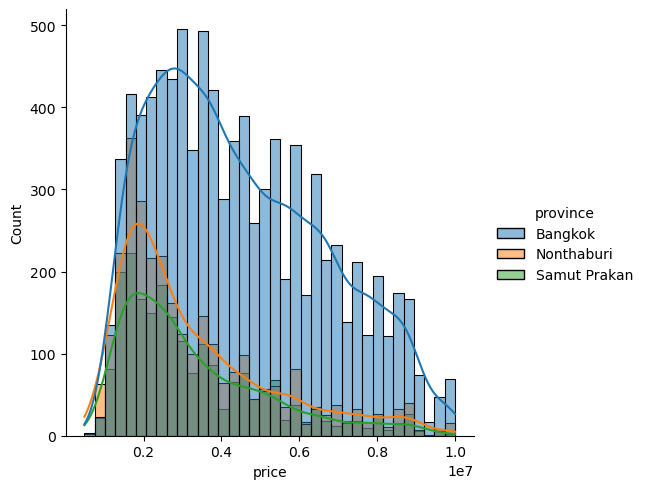

In [310]:
sns.displot(x="price", hue='province', kde=True, data=train_df);

In [311]:
train_df.groupby('province')['price'].mean()

province
Bangkok         4.468327e+06
Nonthaburi      3.284407e+06
Samut Prakan    3.299485e+06
Name: price, dtype: float64

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


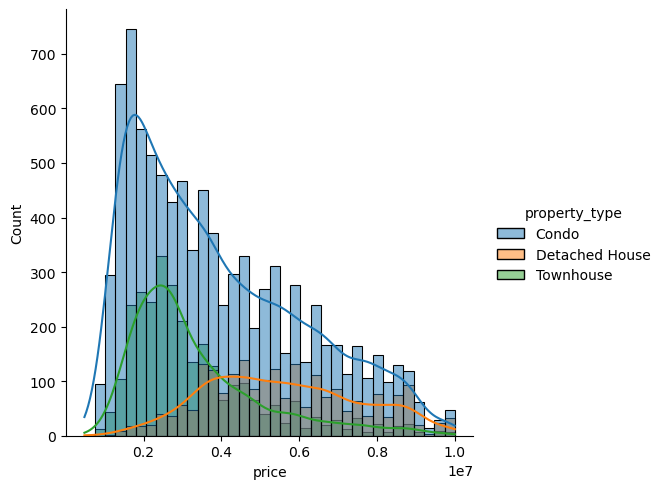

In [312]:
# Check selected features `price`, `property_type`
sns.displot(x="price", hue='property_type', kde=True, data=train_df);

In [313]:
train_df.groupby('property_type')['price'].mean()

property_type
Condo             3.911505e+06
Detached House    5.578554e+06
Townhouse         3.316470e+06
Name: price, dtype: float64

## Boxplot Selected Features

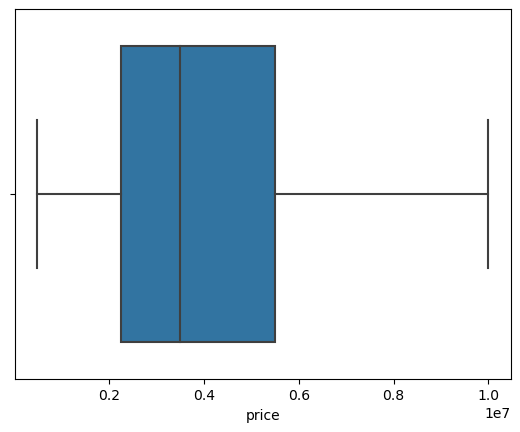

In [314]:
sns.boxplot(x=train_df['price']);

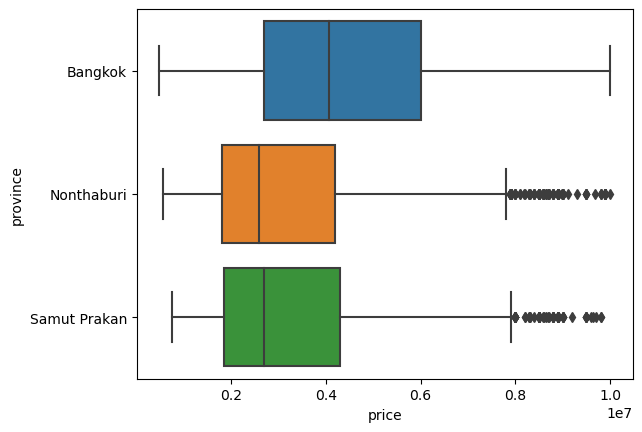

In [315]:
sns.boxplot(data = train_df, x='price', y='province');

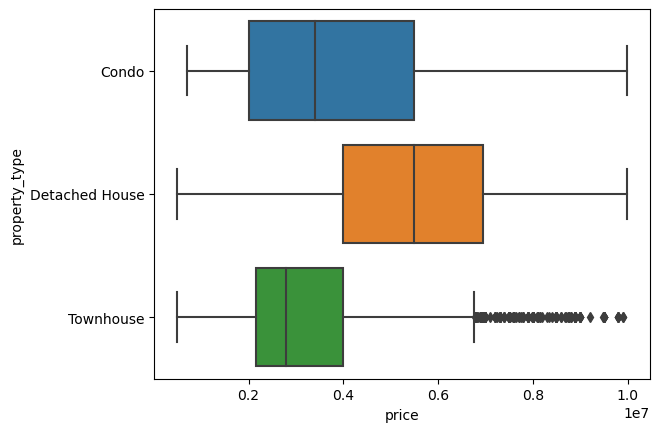

In [316]:
sns.boxplot(data = train_df, x='price', y='property_type');

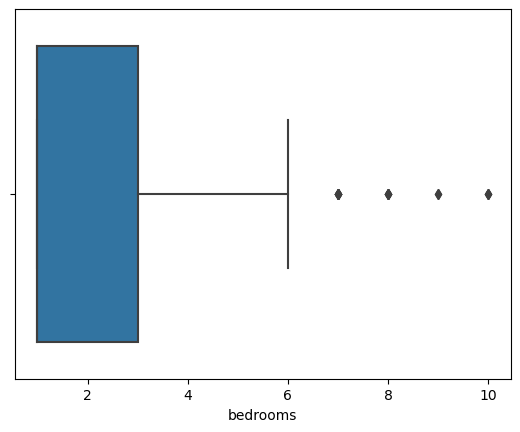

In [317]:
sns.boxplot(x=train_df['bedrooms']);

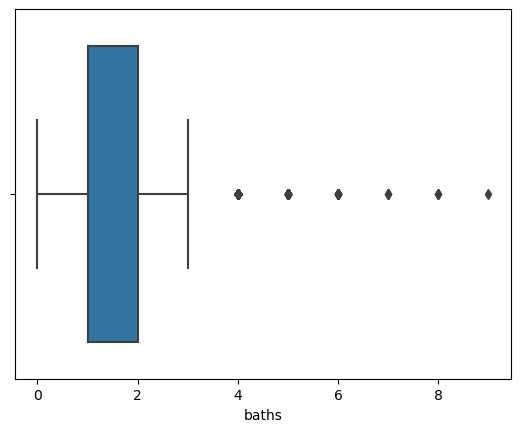

In [318]:
sns.boxplot(x=train_df['baths']);

In [319]:
train_df['bedrooms'].unique()

array([ 2.        ,  1.        ,  3.        ,  4.        ,  6.        ,
        5.        ,  7.        ,  1.88072814, 10.        ,  8.        ,
        9.        ])

In [320]:
train_df['bedrooms'] = train_df['bedrooms'].round()

In [321]:
train_df['bedrooms'].unique()

array([ 2.,  1.,  3.,  4.,  6.,  5.,  7., 10.,  8.,  9.])

In [322]:
train_df['baths'].unique()

array([2.        , 1.        , 3.        , 4.        , 5.        ,
       0.        , 6.        , 1.61829165, 8.        , 9.        ,
       7.        ])

In [323]:
train_df['baths'] = train_df['baths'].round()

In [324]:
train_df['baths'].unique()

array([2., 1., 3., 4., 5., 0., 6., 8., 9., 7.])

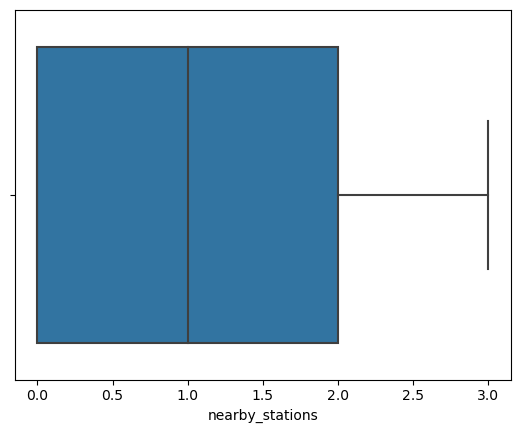

In [325]:
sns.boxplot(x=train_df['nearby_stations']);

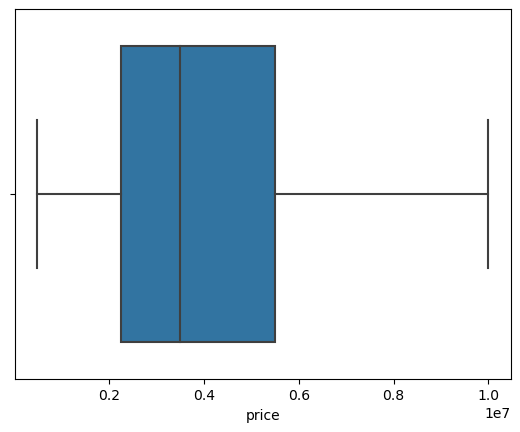

In [326]:
sns.boxplot(x=train_df['price']);

In [327]:
# Identify the columns you want to clean
columns_to_clean = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets']

# Define a function to remove outliers using z-scores
def remove_outliers(train_df, column_name, z_threshold=3):
    z_scores = (train_df[column_name] - train_df[column_name].mean()) / train_df[column_name].std()
    filtered_df = train_df[(z_scores < z_threshold) & (z_scores > -z_threshold)]
    return filtered_df

# Iterate through the specified columns and remove outliers
for column_name in columns_to_clean:
    train_df = remove_outliers(train_df, column_name)

In [328]:
train_df['land_area'].unique()

array([ 258.,  248.,   72.,   87.,  102.,  117.,  132.,   76.,  128.,
        143.,  158.,  173.,  187.,  202.,  217.,  232.,  247.,  262.,
        277.,  291.,  306.,  321.,  336.,  206.,  240.,  204.,  255.,
         92.,   90.,   88.,  197.,  177.,  139.,  119.,  100.,   94.,
         74.,   68.,   80.,   84.,   83.,   81.,  260.,  148.,   36.,
         60.,  107.,  131.,  154.,  178.,  201.,  225.,  249.,  272.,
        296.,  184.,   64.,   97.,  130.,  162.,  195.,  228.,  120.,
        176.,  211.,  190.,  169.,  127.,  106.,   85.,   67.,   69.,
         99.,  112.,  125.,  152.,  145.,  138.,  118.,  111.,  104.,
        124.,  192.,  226.,  256.,  252.,   65.,   70.,   71.,  332.,
        208.,   86.,  156.,  224.,  101.,   91.,  144.,  193.,  186.,
        171.,  163.,  133.,  168.,  179.,  191.,  214.,  237.,   98.,
        142.,  157.,  172.,  216.,  180.,  134.,  114.,  220.,   96.,
        200.,  880.,  242.,  292.,  166.,  236.,   52.,  212.,  164.,
        165.,  199.,

In [329]:
train_df['floor_area'].unique()

array([ 66,  49,  34, 170, 120,  54,  59, 105,  52,  61,  46, 108, 117,
       110,  40,  60,  35,  23,  44,  28,  39,  26, 119,  55, 179,  43,
        72,  47, 160,  32, 230,  22, 139, 190,  33,  48,  58,  99,  31,
        24,  25,  70,  88,  95, 130,  80, 185, 100,  77,  36, 220,  96,
       109,  51,  37, 180, 118, 153,  45,  29,  30,  50,  53,  41,  38,
        64,  75, 113, 136,  86, 175,  93, 140,  65, 154, 163,  27, 128,
       244, 168, 200, 203, 115,  90, 224, 205,  92, 161,  63,  74, 152,
       211, 210, 187, 145, 164,  57, 135, 132,  62, 134, 280,  69, 240,
        67, 150,  20,  82,  42,  56, 171,  76, 112, 143, 116,  78, 142,
       131, 144,  21, 250, 277,  68, 165,  87, 195, 186, 259,  91, 125,
       184,  85, 173, 103, 225, 260, 217, 101, 148, 178, 155, 123,  79,
        73, 158,  84, 226, 193,  71, 265, 204, 127, 222, 212, 137, 255,
       276, 191,  83, 247, 129,  89, 254, 151, 111, 126, 156, 122, 271,
       206, 208,  98, 176, 202, 284, 216, 214, 215, 121, 146,  9

To check outliers in each features which is correlate with price

In [330]:
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,101.000000,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",14.0,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,101.000000,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",14.0,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,101.000000,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",14.0,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,697.0,3.0,3.0,170,...,100.428438,0,Unknown,16.0,2.0,4,0,May,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,454.0,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",17.0,6.0,15,0,March,"[Covered car park, 24 hours security]",2390000


#### Horizontal Bar Chart: `property_type` and `province`

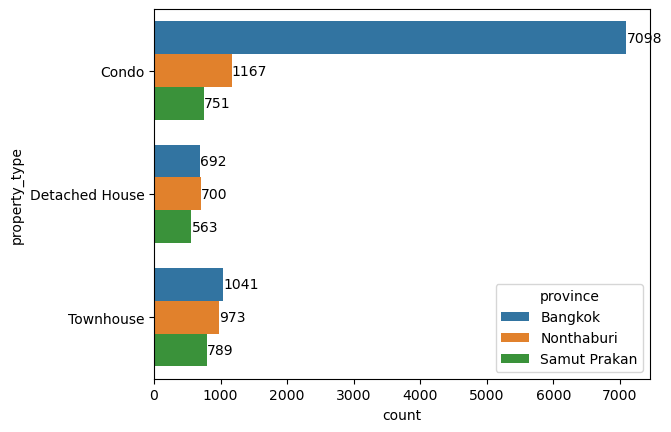

In [331]:
ax = sns.countplot(y='property_type', hue='province', data=train_df)
for i in range(3):
    ax.bar_label(ax.containers[i])

# Correlation Matrices

In [332]:
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,101.000000,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",14.0,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,101.000000,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",14.0,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,101.000000,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",14.0,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,697.0,3.0,3.0,170,...,100.428438,0,Unknown,16.0,2.0,4,0,May,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,454.0,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",17.0,6.0,15,0,March,"[Covered car park, 24 hours security]",2390000


In [333]:
train_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
id,1.000000,-0.013186,0.042285,0.021413,0.032886,0.018016,-0.025256,0.014318,-0.008959,-0.067998,-0.023633,-0.033172,-0.056469,-0.046174,-0.051885
total_units,-0.013186,1.000000,-0.137348,-0.139179,-0.146123,0.183908,-0.008500,0.041110,-0.046764,0.015518,0.059133,-0.043536,-0.032009,0.052350,-0.227408
bedrooms,0.042285,-0.137348,1.000000,0.847244,0.842579,-0.457438,0.007263,0.104336,0.021190,-0.490860,-0.222348,-0.391297,-0.483857,-0.743229,0.217653
baths,0.021413,-0.139179,0.847244,1.000000,0.842503,-0.421948,0.018841,0.090039,0.041728,-0.450041,-0.189912,-0.345259,-0.425471,-0.668820,0.303080
floor_area,0.032886,-0.146123,0.842579,0.842503,1.000000,-0.435100,0.053277,0.104070,0.042163,-0.451687,-0.206192,-0.348273,-0.426217,-0.717634,0.326608
floor_level,0.018016,0.183908,-0.457438,-0.421948,-0.435100,1.000000,0.000753,-0.055262,-0.068286,0.346116,0.134633,0.208858,0.283005,0.457015,0.028883
land_area,-0.025256,-0.008500,0.007263,0.018841,0.053277,0.000753,1.000000,0.014994,0.000263,0.005494,-0.013095,0.002665,-0.002302,0.023515,0.086452
latitude,0.014318,0.041110,0.104336,0.090039,0.104070,-0.055262,0.014994,1.000000,-0.426959,-0.061592,0.027975,-0.123861,-0.115709,-0.104723,-0.056349
longitude,-0.008959,-0.046764,0.021190,0.041728,0.042163,-0.068286,0.000263,-0.426959,1.000000,-0.144356,0.010083,-0.007080,-0.037255,-0.027770,0.038556
nearby_stations,-0.067998,0.015518,-0.490860,-0.450041,-0.451687,0.346116,0.005494,-0.061592,-0.144356,1.000000,0.097530,0.404547,0.563784,0.484181,0.256031


In [334]:
test_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,nearby_bus_stop
id,1.000000,0.004965,0.062675,0.051849,0.061020,0.016390,0.022136,-0.001800,-0.014882,-0.104613,-0.013778,-0.039999,-0.057225,-0.066782,-0.012527
total_units,0.004965,1.000000,-0.120320,-0.127392,-0.127465,0.212483,-0.040091,0.031798,-0.020828,0.014225,0.061264,-0.048109,-0.055512,0.052834,0.061334
bedrooms,0.062675,-0.120320,1.000000,0.839909,0.793050,-0.422266,0.077188,0.129957,-0.011592,-0.483447,-0.220761,-0.377447,-0.451790,-0.751053,-0.220275
baths,0.051849,-0.127392,0.839909,1.000000,0.789836,-0.401743,0.073772,0.100535,0.009586,-0.453379,-0.194903,-0.330669,-0.402787,-0.683477,-0.194503
floor_area,0.061020,-0.127465,0.793050,0.789836,1.000000,-0.399632,0.149007,0.095003,0.036332,-0.433207,-0.188080,-0.321229,-0.385405,-0.702459,-0.187646
floor_level,0.016390,0.212483,-0.422266,-0.401743,-0.399632,1.000000,0.002511,-0.042160,-0.079081,0.356732,0.153638,0.204306,0.288284,0.447448,0.154389
land_area,0.022136,-0.040091,0.077188,0.073772,0.149007,0.002511,1.000000,-0.038876,0.015426,-0.005717,-0.013893,-0.016010,-0.022059,-0.004390,-0.014149
latitude,-0.001800,0.031798,0.129957,0.100535,0.095003,-0.042160,-0.038876,1.000000,-0.420409,-0.080219,-0.015089,-0.118744,-0.119006,-0.135273,-0.015587
longitude,-0.014882,-0.020828,-0.011592,0.009586,0.036332,-0.079081,0.015426,-0.420409,1.000000,-0.131849,0.024190,0.002896,-0.071987,-0.014156,0.025802
nearby_stations,-0.104613,0.014225,-0.483447,-0.453379,-0.433207,0.356732,-0.005717,-0.080219,-0.131849,1.000000,0.089487,0.397072,0.547634,0.494066,0.089794


<Axes: >

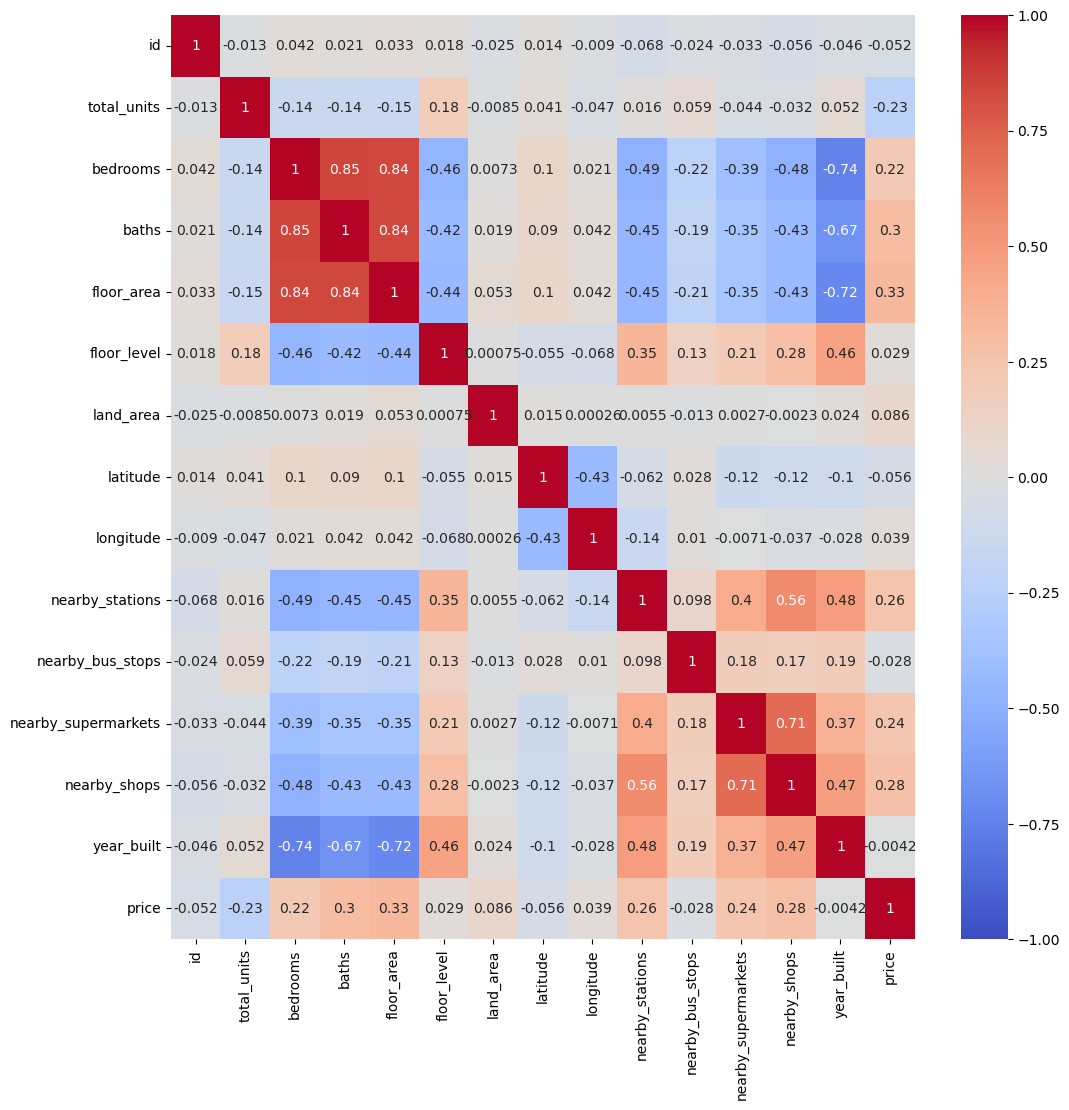

In [335]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

## Distribution

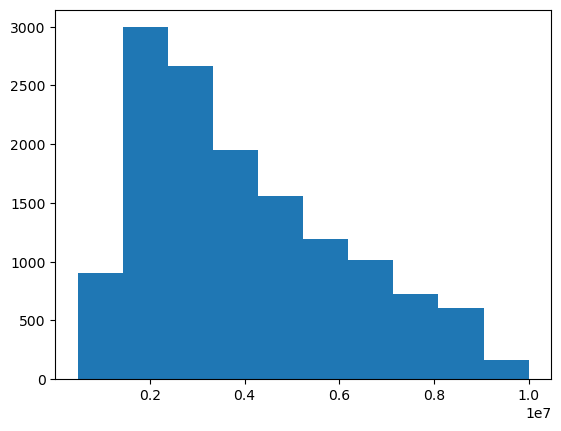

In [336]:
plt.hist(train_df['price']);

In [337]:
np.mean(train_df['price'])

3977021.6190649047

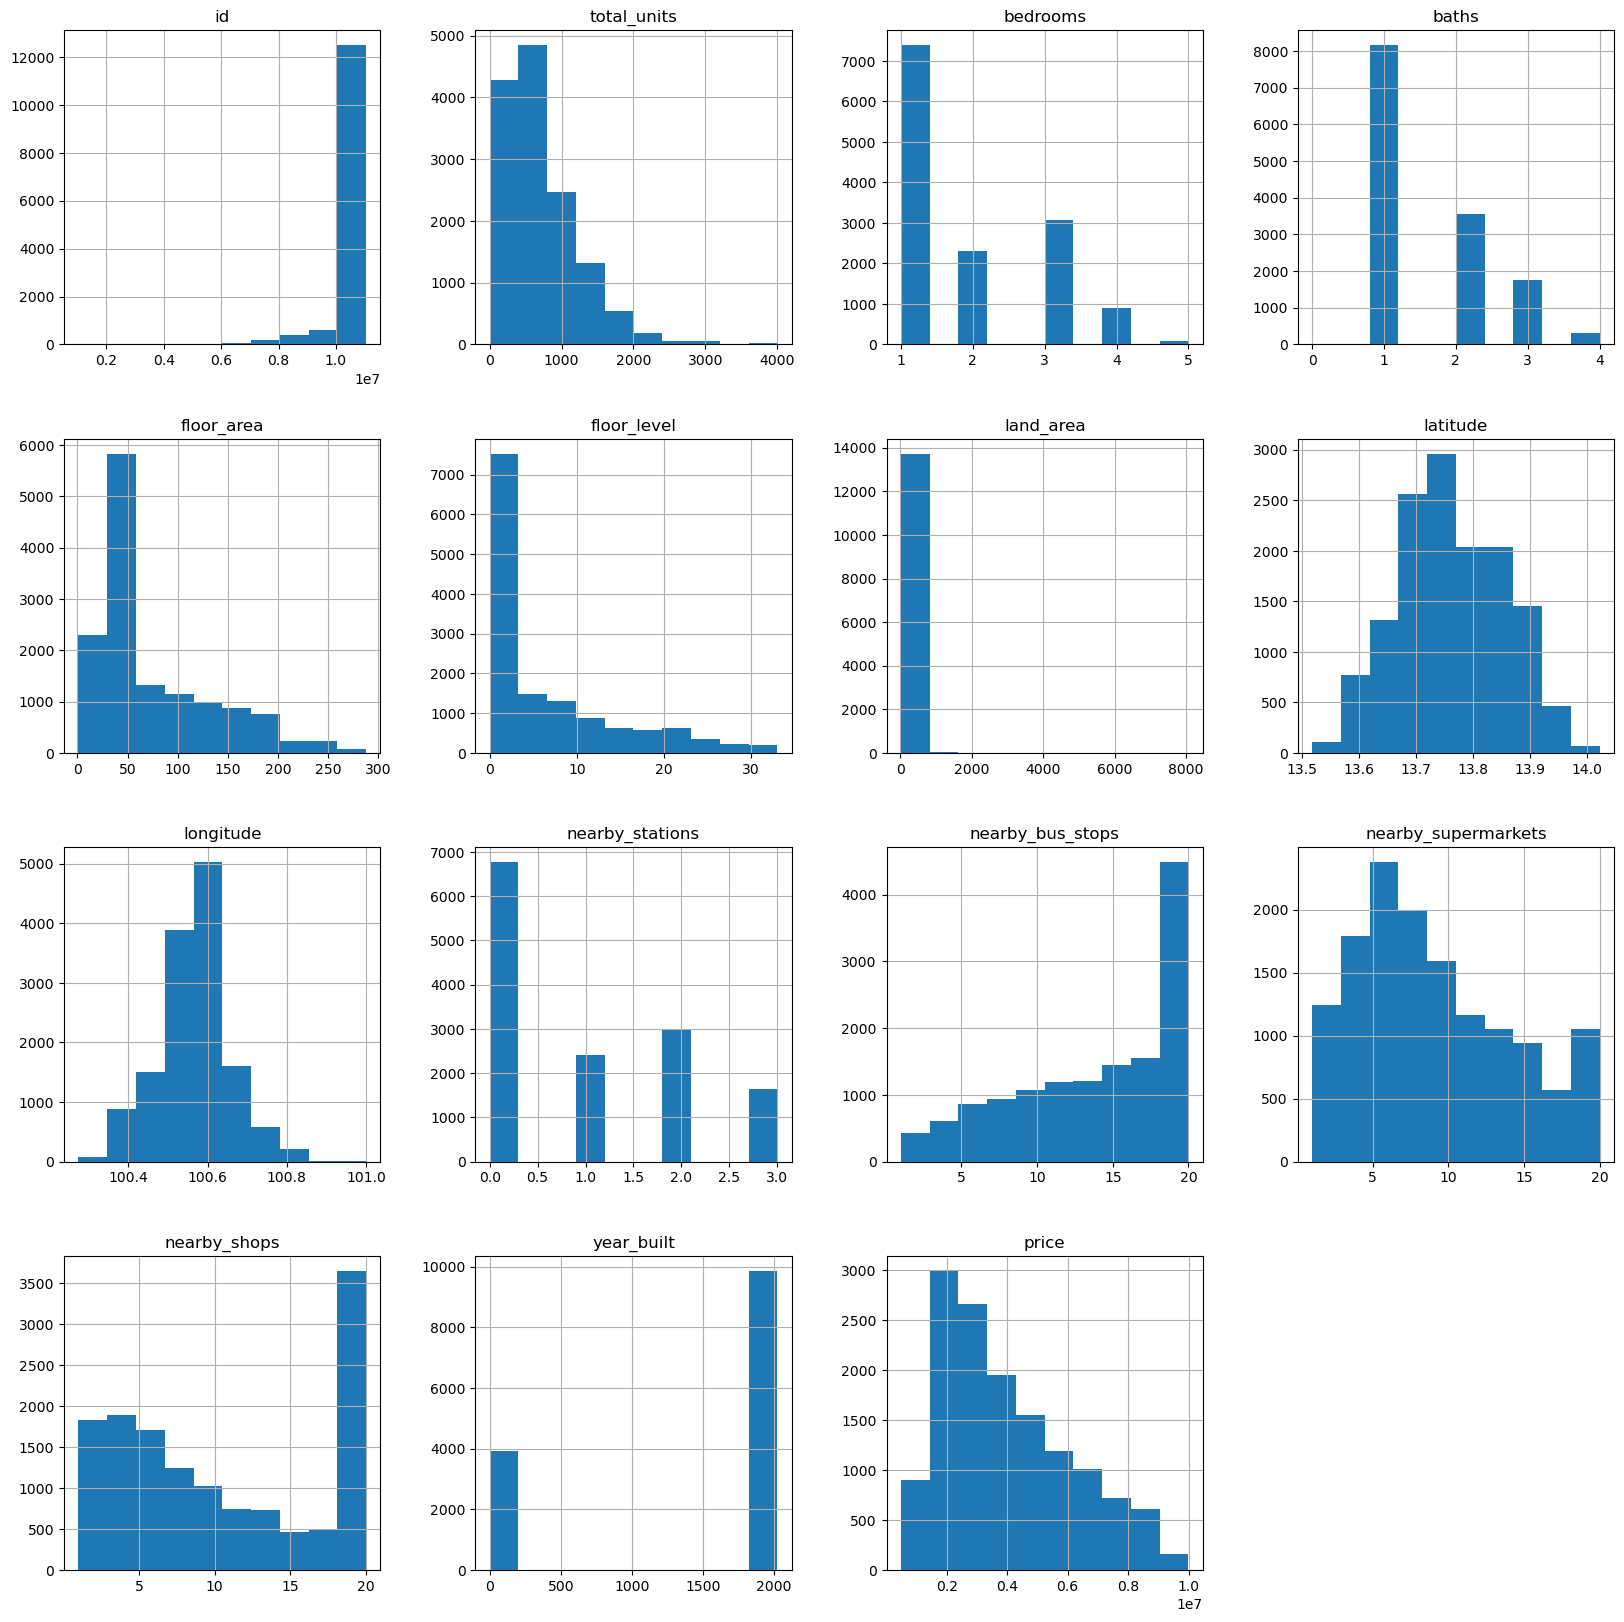

In [338]:
train_df.hist(figsize=(20, 20));

#### Scatter plot

<Axes: xlabel='floor_area', ylabel='price'>

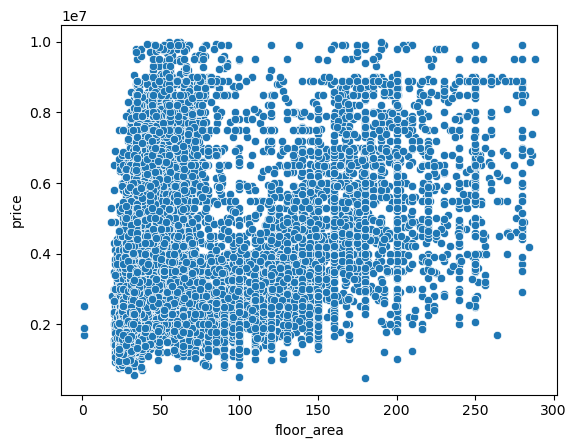

In [339]:
sns.scatterplot(x='floor_area', y='price', data=train_df)

<Axes: xlabel='floor_level', ylabel='price'>

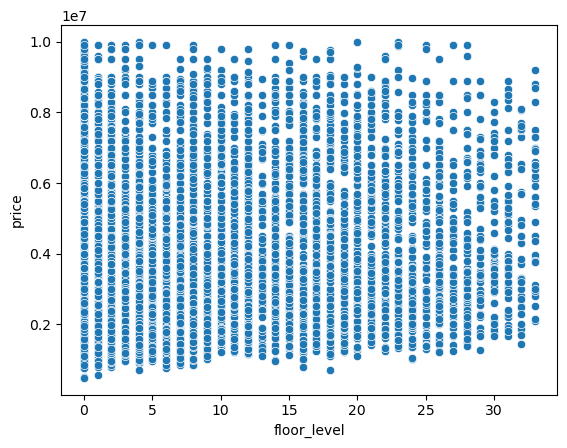

In [340]:
sns.scatterplot(x='floor_level', y='price', data=train_df)

In [341]:
train_df['nearby_stations'].head()

0    2
1    3
2    2
3    0
4    1
Name: nearby_stations, dtype: int64

In [342]:
# sns.pairplot(train_df, hue='price')

#### Facilities

In [343]:
from collections import Counter

facility_count = Counter()
for f in train_df.facilities:
    facility_count.update(f)

facility_count.most_common(10)

[('24 hours security', 11357),
 ('CCTV', 10240),
 ('Swimming pool', 9741),
 ('Fitness corner', 8932),
 ('Covered car park', 5993),
 ('Car Park', 5416),
 ('Community Garden', 3415),
 ('Lift lobby', 3141),
 ('Gymnasium room', 2591),
 ('Clubhouse', 2399)]

## Preprocessing and Feature Engineering

#### Feature Selection

In [344]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                  int32
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [345]:
test_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                  int32
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
nearby_bus_stop            float64
dtype: object

In [346]:
print(train_df['subdistrict'].unique())

['Phra Khanong Nuea' 'Khlong Toei Nuea' 'Khlong Tan' 'Bang Khun Kong'
 'Bang Phai' 'Si Phraya' 'Pak Kret' 'Sai Mai' 'Khlong Tan Nuea' 'Lumphini'
 'Lat Yao' 'Thepharak' 'Dok Mai' 'Phimon Rat' 'Chom Phon' 'Huai Khwang'
 'Bang Chak' 'Suan Luang' 'Wat Tha Phra' 'Nuan Chan' 'Khlong Kum'
 'Khlong Chan' 'Phra Khanong' 'Bang Khen' 'Nong Khaem' 'Samrong Nuea'
 'Bang Pla' 'Ram Inthra' 'Nai Khlong Bang Pla Kot' 'Bang Rak Phatthana'
 'Bang Kaeo' 'Pak Nam' 'Sao Thong Hin' 'Sena Nikhom' 'Sisa Chorakhe Noi'
 'Sam Sen Nai' 'Saphan Sung' 'O Ngoen' 'Maha Sawat' 'Khlong Kluea'
 'Din Daeng' 'Si Kan' 'Nong Khang Phlu' 'Makkasan' 'Bang Khu Rat'
 'Bukkhalo' 'Talat Khwan' 'Bang Yi Khan' 'Saen Saep' 'Bang Kraso'
 'Thung Song Hong' 'Bang Chan' 'Plai Bang' 'Bang Bua Thong' 'Chong Nonsi'
 'Bang Phlap' 'Sai Noi' 'Racha Thewa' 'Thanon Phaya Thai' 'Hua Mak'
 'Bang Na' 'Suriyawong' 'Chatuchak' 'Tha Raeng' 'Samrong' 'Lat Phrao'
 'Nong Prue' 'Bang Kapi' 'Bang Sue' 'Khan Na Yao' 'Khlong Ton Sai'
 'Bang Khun Si' 'Bang Wa

Review features from correlation

In [347]:
train_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
id,1.000000,-0.013186,0.042285,0.021413,0.032886,0.018016,-0.025256,0.014318,-0.008959,-0.067998,-0.023633,-0.033172,-0.056469,-0.046174,-0.051885
total_units,-0.013186,1.000000,-0.137348,-0.139179,-0.146123,0.183908,-0.008500,0.041110,-0.046764,0.015518,0.059133,-0.043536,-0.032009,0.052350,-0.227408
bedrooms,0.042285,-0.137348,1.000000,0.847244,0.842579,-0.457438,0.007263,0.104336,0.021190,-0.490860,-0.222348,-0.391297,-0.483857,-0.743229,0.217653
baths,0.021413,-0.139179,0.847244,1.000000,0.842503,-0.421948,0.018841,0.090039,0.041728,-0.450041,-0.189912,-0.345259,-0.425471,-0.668820,0.303080
floor_area,0.032886,-0.146123,0.842579,0.842503,1.000000,-0.435100,0.053277,0.104070,0.042163,-0.451687,-0.206192,-0.348273,-0.426217,-0.717634,0.326608
floor_level,0.018016,0.183908,-0.457438,-0.421948,-0.435100,1.000000,0.000753,-0.055262,-0.068286,0.346116,0.134633,0.208858,0.283005,0.457015,0.028883
land_area,-0.025256,-0.008500,0.007263,0.018841,0.053277,0.000753,1.000000,0.014994,0.000263,0.005494,-0.013095,0.002665,-0.002302,0.023515,0.086452
latitude,0.014318,0.041110,0.104336,0.090039,0.104070,-0.055262,0.014994,1.000000,-0.426959,-0.061592,0.027975,-0.123861,-0.115709,-0.104723,-0.056349
longitude,-0.008959,-0.046764,0.021190,0.041728,0.042163,-0.068286,0.000263,-0.426959,1.000000,-0.144356,0.010083,-0.007080,-0.037255,-0.027770,0.038556
nearby_stations,-0.067998,0.015518,-0.490860,-0.450041,-0.451687,0.346116,0.005494,-0.061592,-0.144356,1.000000,0.097530,0.404547,0.563784,0.484181,0.256031


In [348]:
train_df['nearby_station_distance'].head()

0      [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]
1    [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...
2    [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...
3                                              Unknown
4                   [[PP09 Yaek Nonthaburi 1 MRT, 10]]
Name: nearby_station_distance, dtype: object

In [349]:
feat_num = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets' ]
feat_cat = ['property_type', 'district']

train_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
Index: 13774 entries, 0 to 14270
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   floor_area           13774 non-null  int64  
 1   bedrooms             13774 non-null  float64
 2   baths                13774 non-null  float64
 3   floor_level          13774 non-null  int32  
 4   land_area            13774 non-null  float64
 5   nearby_stations      13774 non-null  int64  
 6   nearby_shops         13774 non-null  int64  
 7   nearby_supermarkets  13774 non-null  float64
 8   property_type        13774 non-null  object 
 9   district             13774 non-null  object 
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 1.1+ MB


#### Train - dev Split

In [350]:
# train_df.fit()
# 1. declare X and y (optional: train-dev split)
# 2. StandardScaler() -> fit_transform() & transform()
# 3. Instantiate model
# 4. Fit
# 5. Evaluation (R2, RMSE) !both on training and development set

In [351]:
X = pd.get_dummies(train_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = train_df['price']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

In [352]:
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_dev_scale = ss.transform(X_dev)

In [353]:
pd.DataFrame(X_train).head()

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,property_type_Detached House,property_type_Townhouse,...,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
1283,43,1.0,1.0,0,75.0,1,20,16.0,False,False,...,False,False,False,False,False,False,False,False,False,False
5990,34,1.0,1.0,0,100.0,3,20,19.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4828,27,1.0,1.0,3,133.0,2,6,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
5288,52,1.0,1.0,6,90.0,3,20,20.0,False,False,...,False,False,False,False,False,False,False,False,False,False
6872,22,2.0,1.0,22,209.0,1,1,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [354]:
pd.DataFrame(X_train_scale).head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-0.542803,-0.814317,-0.71999,-0.753540,-0.455862,0.031121,1.363057,1.306944,-0.406106,-0.504279,...,-0.068859,-0.120613,-0.140733,-0.04045,-0.026955,-0.11668,-0.069521,-0.089725,-0.246461,-0.118662
1,-0.695029,-0.814317,-0.71999,-0.753540,-0.319743,1.869871,1.363057,1.870659,-0.406106,-0.504279,...,-0.068859,-0.120613,-0.140733,-0.04045,-0.026955,-0.11668,-0.069521,-0.089725,-0.246461,-0.118662
2,-0.813428,-0.814317,-0.71999,-0.386686,-0.140066,0.950496,-0.648859,-1.511629,-0.406106,-0.504279,...,-0.068859,-0.120613,-0.140733,-0.04045,-0.026955,-0.11668,-0.069521,-0.089725,-0.246461,-0.118662
3,-0.390576,-0.814317,-0.71999,-0.019831,-0.374190,1.869871,1.363057,2.058564,-0.406106,-0.504279,...,-0.068859,-0.120613,-0.140733,-0.04045,-0.026955,-0.11668,-0.069521,-0.089725,-0.246461,-0.118662
4,-0.897998,0.164516,-0.71999,1.936725,0.273735,0.031121,-1.367400,-1.323724,-0.406106,-0.504279,...,-0.068859,-0.120613,-0.140733,-0.04045,-0.026955,-0.11668,-0.069521,-0.089725,-0.246461,-0.118662


In [355]:
# Instantiate the model
lr=LinearRegression()

In [356]:
#Fit the model
lr.fit(X_train_scale, y_train)

LinearRegression()

In [357]:
pred_train = lr.predict(X_train_scale)
pred_dev = lr.predict(X_dev_scale)

print(mean_squared_error(y_train, pred_train, squared=False))
print(mean_squared_error(y_dev, pred_dev, squared=False))

1257516.6078736205
1306637.868538625


In [358]:
lr.coef_

array([ 800493.76692   ,  456050.11925896,  778151.01239259,
        166842.10603279,   25625.94678004,  384640.74583943,
        187740.17663933,    8900.21107132,  -79744.27189479,
       -629132.26695112,  -18857.74445331, -131778.75458476,
         74484.53895157,   -4055.54264637,   34564.67817696,
        211648.77720788,   -4138.74332324,   41659.65692379,
        175988.50307204,   74986.88906955,   55953.98643646,
        414197.61516007,   -9254.5338718 ,   93065.36205436,
        -55442.30761666,   37483.63064439,   62439.74601835,
         21589.55492129,  316443.25682047,   39261.55930514,
        203272.34655261,   25213.30026459,  389610.7632479 ,
         34515.49790158,  -27774.87597549,  226529.22869513,
        646067.29573348,   46268.42066945,    4486.45386047,
        108974.66394663,   18653.27985701,   28409.27626965,
         28338.82058344,  -50595.24725274,  -16226.80727534,
         84125.53698897,  339805.30920146,   27745.41792131,
        337962.58034546,

In [359]:
lr.intercept_

3985997.073237136

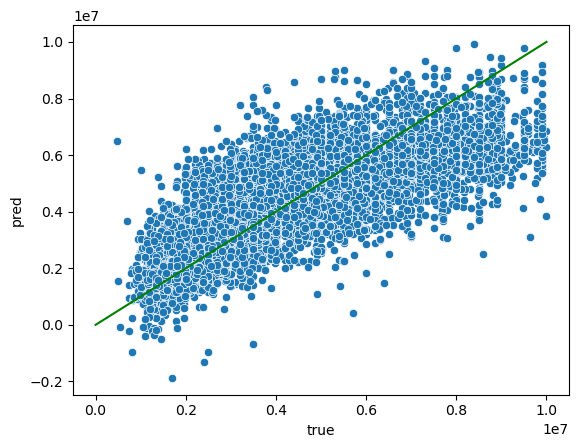

In [360]:
df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
df_result['residual'] = df_result['pred'] - df_result['true']

sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


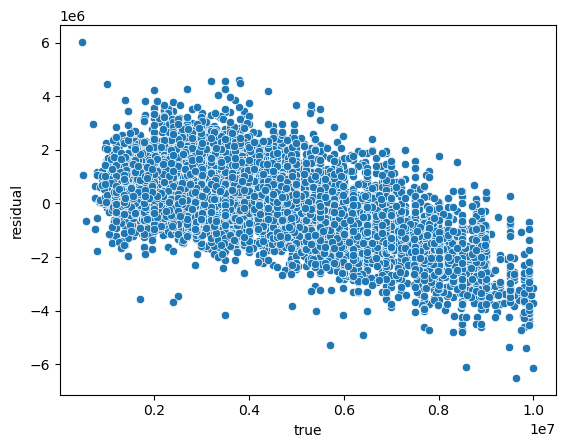

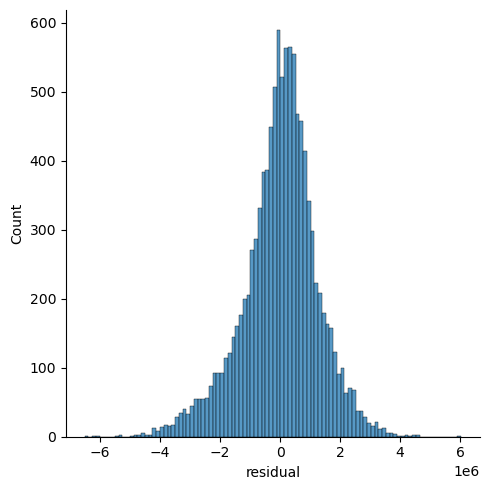

In [361]:
sns.scatterplot(x='true', y='residual', data=df_result)
sns.displot(x='residual', data=df_result);

## Extend to Ridge Regression Model

In [362]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# Define a range of alpha values for Ridge regression
r_alphas = np.logspace(-6, 6, 13)

# Create a RidgeCV model to perform cross-validated alpha selection
ridgecv = RidgeCV(alphas=r_alphas, store_cv_values=True)

# Fit the RidgeCV model to the training data
ridgecv.fit(X_train_scale, y_train)

# Create a Ridge model with the best alpha from RidgeCV
ridge = Ridge(alpha=ridgecv.alpha_)

# Calculate R-squared scores using cross-validation
ridge_scores = cross_val_score(ridgecv, X_train_scale, y_train, cv=5, scoring='r2')

print("R-squared scores from cross-validation:")
print(ridge_scores)
print("Mean R-squared score:", np.mean(ridge_scores))

# Predict on the training data using RidgeCV
ridge_train_predictions = ridgecv.predict(X_train_scale)

# Calculate the R-squared score for the training data
ridge_train_score = r2_score(y_train, ridge_train_predictions)

print("R-squared score for RidgeCV on the training data:", ridge_train_score)

# Predict on the testing data using RidgeCV
ridge_test_predictions = ridgecv.predict(X_dev_scale)

# Calculate the R-squared score for the testing data
ridge_test_score = r2_score(y_dev, ridge_test_predictions)

print("R-squared score for RidgeCV on the testing data:", ridge_test_score)
print("RMSE of test:", mean_squared_error(y_dev, ridge_test_predictions, squared=False))


R-squared scores from cross-validation:
[0.64976852 0.62920925 0.66117612 0.66758464 0.66576496]
Mean R-squared score: 0.6547006955612947
R-squared score for RidgeCV on the training data: 0.6605889618850946
R-squared score for RidgeCV on the testing data: 0.6192715898390202
RMSE of test: 1306659.1119064386


In [363]:
# Predict on the testing data using RidgeCV
ridge_test_predictions = ridgecv.predict(X_dev_scale)

# Calculate the Mean Squared Error for the testing data
ridge_mse = mean_squared_error(y_dev, ridge_test_predictions)

print("Mean Squared Error of RidgeCV on the testing data:", ridge_mse)

Mean Squared Error of RidgeCV on the testing data: 1707358034728.1228


In [364]:
r_alphas = np.logspace(-6, 6, 13)

In [365]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
ridgecv = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridgecv.fit(X_train_scale, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        store_cv_values=True)

In [366]:
ridgecv.alpha_

1.0

In [367]:
ridgecv_r2_scores = cross_val_score(ridgecv, X_train_scale, y_train, cv=5, scoring='r2')

In [368]:
ridge = Ridge(alpha=ridgecv.alpha_)

#R2
ridge_scores = cross_val_score(ridgecv, X_train_scale, y_train, cv=5, scoring='r2')

print (ridge_scores)
print (np.mean(ridge_scores))

[0.64976852 0.62920925 0.66117612 0.66758464 0.66576496]
0.6547006955612947


In [369]:
# Train score:
from sklearn.metrics import r2_score  # Import the R-squared scoring metric

# Assuming you've already trained the RidgeCV model on your training data
ridge_train_predictions = ridgecv.predict(X_train_scale)  # Predict on the training data

# Calculate the R-squared score for the training data
ridge_train_score = r2_score(y_train, ridge_train_predictions)

# Now you can print the training score
print("R-squared score for RidgeCV on the training data:", ridge_train_score)

R-squared score for RidgeCV on the training data: 0.6605889618850946


In [370]:
# Test  score:

ridge_test_predictions = ridgecv.predict(X_dev_scale)
ridge_test_score = r2_score(y_dev, ridge_test_predictions)

print("R-squared score for RidgeCV on the testing data:", ridge_test_score)
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R-squared score for RidgeCV on the testing data: 0.6192715898390202
RMSE of test  : 1306637.868538625


In [372]:
ridge_test_predictions

array([1337399.30282664, 3560215.65647035, 5675733.87480877, ...,
       5350366.59996674, 3285898.77646208, 3829841.2971529 ])

In [373]:
X_train_scale.shape

(11019, 67)

In [374]:
X_dev_scale.shape

(2755, 67)

In [376]:
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

RMSE of test  : 1306637.868538625


In [377]:
X_train.shape

(11019, 67)

In [378]:
X_dev.shape

(2755, 67)

In [379]:
print(" OLS ".center(18, "="))
print(lr.score(X_train, y_train))
print(lr.score(X_dev, y_dev))
print()
print(" Ridge ".center(18, "="))
print(ridgecv.score(X_train_scale, y_train))
print(ridgecv.score(X_dev_scale, y_dev))

====== OLS =======
-1506.3360308543786
-1586.020278817091

===== Ridge ======
0.6605889618850946
0.6192715898390202


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [380]:
print(mean_squared_error(y_train, pred_train, squared=False))
print(mean_squared_error(y_dev, pred_dev, squared=False))

1257516.6078736205
1306637.868538625


In [381]:
ridge_test_predictions = ridgecv.predict(X_dev_scale)
ridge_mse = mean_squared_error(y_dev, ridge_test_predictions)

print("Mean Squared Error (MSE) of RidgeCV on the testing data:", ridge_mse)

Mean Squared Error (MSE) of RidgeCV on the testing data: 1707358034728.1228


# Test Data

In [382]:
test_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,nearby_bus_stop
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,101.000000,0,Unknown,14.0,9.0,5,0,July,"[Clubhouse, Community Garden, CCTV, Pavillion,...",14.0
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,100.341833,0,Unknown,20.0,9.0,5,2020,July,"[Car Park, Clubhouse, Community Garden, CCTV, ...",20.0
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",20.0,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",20.0
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,100.547923,0,Unknown,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0


#### Clean Data

In [383]:
test_df['subdistrict'].unique()

array(['Bang Phli Yai', 'Nong Khang Phlu', 'Huai Khwang', 'Khlong Tan',
       'Thung Song Hong', 'Bang Mot', 'Bang Kapi', 'Pak Nam', 'Bang Sue',
       'Din Daeng', 'Khlong Tan Nuea', 'Bang Khen', 'Sam Sen Nok',
       'Thepharak', 'O Ngoen', 'Samrong Nuea', 'Racha Thewa',
       'Sam Wa Tawan Tok', 'Thanon Phetchaburi', 'Thung Wat Don',
       'Sao Thong Hin', 'Anusawari', 'Maha Phruettharam',
       'Phra Khanong Nuea', 'Phra Khanong', 'Sam Sen Nai', 'Bang Na',
       'Hua Mak', 'Lat Phrao', 'Bang Kraso', 'Thung Maha Mek',
       'Bang Muang', 'Bang Phai', 'Phraek Sa Mai',
       'IDEO Thaphra Interchange', 'Wang Thonglang', 'Phraek Sa',
       'Khlong Toei Nuea', 'Thap Yao', 'Bang Chak', 'Thung Khru',
       'Rong Mueang', 'Sai Ma', 'Prawet', 'Taling Chan', 'Bukkhalo',
       'Makkasan', 'Sena Nikhom', 'Nawamin', 'Maha Sawat', 'Bang Khae',
       'Ban Mai', 'Chong Nonsi', 'Saphan Sung', 'Suan Luang', 'Tha Kham',
       'Bang Khu Rat', 'Talat Khwan', 'Bang Khun Si', 'Bang Kaeo',
   

In [384]:
test_replace_dict = {'The Kris Express 2':'Din Daeng', 'The Kris Extra 5':'Din Daeng', 'The Mark Ratchada-Airport Link':'Makkasan', 
                'The Alcove Sukhumvit 49':'Khlong Tan Nuea', 'The Bloom Sukhumvit 71':'Phra Khanong Nuea',
                'Whizdom The Exclusive':'Bang Chak', 'Sathorn Happy Land': 'Khlong Chan', 'StarView Rama 3':'Bang Khlo', 'Smart Condo Rama 2':'Samae Dam', 'ASHTON Silom':'Suriyawong', 'M Silom':'Suriyawong', 'IDEO Thaphra Interchange':'Wat Tha Phra', 'Supalai Park Ratchayothin':'Lat Yao', 'Lumpini Suite Dindaeng-Ratchaprarop':'Din Daeng', 
                'Chateau In Town Ratchada 20':'Sam Sen Nok', 'Noble Revolve Ratchada':'Huai Khwang', 
                'Villa Sathorn':'Khlong Ton Sai', 'Plum Condo Chaengwattana Station':'Talat Bang Khen', 
               'CU Terrace':'Wang Mai', 'Life Asoke - Rama 9':'Makkasan', 'Baan Nonsi':'Thung Wat Don', 
               'Beverly Tower':'Khlong Toei Nuea', 'Supalai Premier Ratchada-Narathiwas-Sathorn':'Chong Nonsi', 
               'Vio Khaerai 2':'Talat Khwan', 'DOUBLELAKE เมืองทองธานี CONDOMINIUM':'Ban Mai', 'NUE Noble Chaengwattana':'Bang Talat',
               'Baan Suanthon Srinakarin condominium':'Bang Kaeo', 'Kensington Condominium':'Samrong Nuea',
               'Nara 9 Sathorn-Narathiwas':'Thung Maha Mek'}

# Replace values in the 'Color' column
test_df['subdistrict'] = test_df['subdistrict'].replace(test_replace_dict)

# Display the DataFrame with values replaced
print(test_df)

            id      province             district        subdistrict  \
0     10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
1     10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
2     10765951       Bangkok          Huai Khwang        Huai Khwang   
3     10003549       Bangkok          Khlong Toei         Khlong Tan   
4     10663026       Bangkok               Lak Si    Thung Song Hong   
...        ...           ...                  ...                ...   
2495  10889363       Bangkok             Bang Rak  Maha Phruettharam   
2496  10975839       Bangkok               Sathon     Thung Maha Mek   
2497  10986832       Bangkok           Bang Phlat       Bang Yi Khan   
2498  10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
2499  10910437       Bangkok           Chom Thong           Bang Kho   

                                        address   property_type  total_units  \
0                            Nam Daeng Road Yai  Detach

In [385]:
test_df['subdistrict'].unique()

array(['Bang Phli Yai', 'Nong Khang Phlu', 'Huai Khwang', 'Khlong Tan',
       'Thung Song Hong', 'Bang Mot', 'Bang Kapi', 'Pak Nam', 'Bang Sue',
       'Din Daeng', 'Khlong Tan Nuea', 'Bang Khen', 'Sam Sen Nok',
       'Thepharak', 'O Ngoen', 'Samrong Nuea', 'Racha Thewa',
       'Sam Wa Tawan Tok', 'Thanon Phetchaburi', 'Thung Wat Don',
       'Sao Thong Hin', 'Anusawari', 'Maha Phruettharam',
       'Phra Khanong Nuea', 'Phra Khanong', 'Sam Sen Nai', 'Bang Na',
       'Hua Mak', 'Lat Phrao', 'Bang Kraso', 'Thung Maha Mek',
       'Bang Muang', 'Bang Phai', 'Phraek Sa Mai', 'Wat Tha Phra',
       'Wang Thonglang', 'Phraek Sa', 'Khlong Toei Nuea', 'Thap Yao',
       'Bang Chak', 'Thung Khru', 'Rong Mueang', 'Sai Ma', 'Prawet',
       'Taling Chan', 'Bukkhalo', 'Makkasan', 'Sena Nikhom', 'Nawamin',
       'Maha Sawat', 'Bang Khae', 'Ban Mai', 'Chong Nonsi', 'Saphan Sung',
       'Suan Luang', 'Tha Kham', 'Bang Khu Rat', 'Talat Khwan',
       'Bang Khun Si', 'Bang Kaeo', 'Chom Phon', 'B

In [386]:
test_df.isnull().sum()

id                         0
province                   0
district                   0
subdistrict                0
address                    0
property_type              0
total_units                0
bedrooms                   0
baths                      0
floor_area                 0
floor_level                0
land_area                  0
latitude                   0
longitude                  0
nearby_stations            0
nearby_station_distance    0
nearby_bus_stops           0
nearby_supermarkets        0
nearby_shops               0
year_built                 0
month_built                0
facilities                 0
nearby_bus_stop            0
dtype: int64

In [387]:
test_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                  int32
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
nearby_bus_stop            float64
dtype: object

In [388]:
test_df.corr(numeric_only=True)

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,nearby_bus_stop
id,1.000000,0.004965,0.062675,0.051849,0.061020,0.016390,0.022136,-0.001800,-0.014882,-0.104613,-0.013778,-0.039999,-0.057225,-0.066782,-0.012527
total_units,0.004965,1.000000,-0.120320,-0.127392,-0.127465,0.212483,-0.040091,0.031798,-0.020828,0.014225,0.061264,-0.048109,-0.055512,0.052834,0.061334
bedrooms,0.062675,-0.120320,1.000000,0.839909,0.793050,-0.422266,0.077188,0.129957,-0.011592,-0.483447,-0.220761,-0.377447,-0.451790,-0.751053,-0.220275
baths,0.051849,-0.127392,0.839909,1.000000,0.789836,-0.401743,0.073772,0.100535,0.009586,-0.453379,-0.194903,-0.330669,-0.402787,-0.683477,-0.194503
floor_area,0.061020,-0.127465,0.793050,0.789836,1.000000,-0.399632,0.149007,0.095003,0.036332,-0.433207,-0.188080,-0.321229,-0.385405,-0.702459,-0.187646
floor_level,0.016390,0.212483,-0.422266,-0.401743,-0.399632,1.000000,0.002511,-0.042160,-0.079081,0.356732,0.153638,0.204306,0.288284,0.447448,0.154389
land_area,0.022136,-0.040091,0.077188,0.073772,0.149007,0.002511,1.000000,-0.038876,0.015426,-0.005717,-0.013893,-0.016010,-0.022059,-0.004390,-0.014149
latitude,-0.001800,0.031798,0.129957,0.100535,0.095003,-0.042160,-0.038876,1.000000,-0.420409,-0.080219,-0.015089,-0.118744,-0.119006,-0.135273,-0.015587
longitude,-0.014882,-0.020828,-0.011592,0.009586,0.036332,-0.079081,0.015426,-0.420409,1.000000,-0.131849,0.024190,0.002896,-0.071987,-0.014156,0.025802
nearby_stations,-0.104613,0.014225,-0.483447,-0.453379,-0.433207,0.356732,-0.005717,-0.080219,-0.131849,1.000000,0.089487,0.397072,0.547634,0.494066,0.089794


In [389]:
feat_num = ['floor_area', 'bedrooms', 'baths', 'floor_level', 'land_area', 'nearby_stations', 'nearby_shops', 'nearby_supermarkets']
feat_cat = ['property_type', 'district']

test_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   floor_area           2500 non-null   int64  
 1   bedrooms             2500 non-null   float64
 2   baths                2500 non-null   float64
 3   floor_level          2500 non-null   int32  
 4   land_area            2500 non-null   float64
 5   nearby_stations      2500 non-null   int64  
 6   nearby_shops         2500 non-null   int64  
 7   nearby_supermarkets  2500 non-null   float64
 8   property_type        2500 non-null   object 
 9   district             2500 non-null   object 
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 185.7+ KB


In [390]:
X_test_imputed = pd.get_dummies(test_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [391]:
X_test_imputed

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,property_type_Detached House,property_type_Townhouse,...,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
0,120,4.0,3.0,0,140.0,0,5,9.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,188,4.0,3.0,0,208.0,0,5,9.0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,22,1.0,1.0,23,177.0,3,20,13.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,41,1.0,1.0,5,146.0,1,20,16.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,29,1.0,1.0,25,115.0,0,14,10.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,33,1.0,1.0,12,140.0,2,20,18.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2496,65,1.0,1.0,33,140.0,3,20,20.0,False,False,...,False,True,False,False,False,False,False,False,False,False
2497,42,1.0,1.0,10,140.0,1,7,5.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2498,28,1.0,1.0,8,140.0,1,20,13.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [392]:
# Align dataframe before prediction
X_test_imputed, _ = test_df.align(X_train, join='right', axis=1, fill_value=0)
# X_test_imputed = pd.DataFrame(test_df)

In [393]:
X_test_imputed

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,property_type_Detached House,property_type_Townhouse,...,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
0,120,4.0,3.0,0,140.0,0,5,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,188,4.0,3.0,0,208.0,0,5,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,1.0,1.0,23,177.0,3,20,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41,1.0,1.0,5,146.0,1,20,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,1.0,1.0,25,115.0,0,14,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,33,1.0,1.0,12,140.0,2,20,18.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,65,1.0,1.0,33,140.0,3,20,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,42,1.0,1.0,10,140.0,1,7,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,28,1.0,1.0,8,140.0,1,20,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
X_test_imputed.loc[X_test_imputed['floor_level'] == 0,['floor_level']] = np.random.randint(3,30)
X_test_imputed

,floor_area,bedrooms,baths,floor_level,land_area,nearby_stations,nearby_shops,nearby_supermarkets,property_type_Detached House,property_type_Townhouse,...,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
0,120,4.0,3.0,14,140.0,0,5,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,188,4.0,3.0,14,208.0,0,5,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,1.0,1.0,23,177.0,3,20,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41,1.0,1.0,5,146.0,1,20,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,1.0,1.0,25,115.0,0,14,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,33,1.0,1.0,12,140.0,2,20,18.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,65,1.0,1.0,33,140.0,3,20,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,42,1.0,1.0,10,140.0,1,7,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,28,1.0,1.0,8,140.0,1,20,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [395]:
X_test_scale = ss.transform(X_test_imputed)
X_test_scale

array([[ 0.75958182,  2.12218084,  1.78785627, ..., -0.08972457,
        -0.24646129, -0.11866178],
       [ 1.90973941,  2.12218084,  1.78785627, ..., -0.08972457,
        -0.24646129, -0.11866178],
       [-0.89799824, -0.81431694, -0.71999024, ..., -0.08972457,
        -0.24646129, -0.11866178],
       ...,
       [-0.55971659, -0.81431694, -0.71999024, ..., -0.08972457,
        -0.24646129, -0.11866178],
       [-0.79651374, -0.81431694, -0.71999024, ..., -0.08972457,
        -0.24646129, -0.11866178],
       [-0.76268558, -0.81431694, -0.71999024, ..., -0.08972457,
        -0.24646129, -0.11866178]])

In [397]:
test_predictions = ridgecv.predict(X_test_scale)
np.shape(test_predictions)

(2500,)

In [398]:
test_predictions

array([5962324.70325737, 6892178.5030441 , 3007841.21530864, ...,
       1935821.47435694, 2070240.8835889 , 2151960.2523627 ])

In [399]:
test_df['price'] = test_predictions
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,nearby_bus_stop,price
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,0,Unknown,14.0,9.0,5,0,July,"[Clubhouse, Community Garden, CCTV, Pavillion,...",14.0,5.962325e+06
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,0,Unknown,20.0,9.0,5,2020,July,"[Car Park, Clubhouse, Community Garden, CCTV, ...",20.0,6.892179e+06
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",20.0,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0,3.007841e+06
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",20.0,2.190841e+06
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,0,Unknown,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",20.0,1.906283e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",19.5,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar...",20.0,2.581699e+06
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna...",20.0,3.800490e+06
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,1,"[[BL05 Bang Yi Khan MRT, 910]]",19.5,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor...",20.0,1.935821e+06
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho...",19.0,2.070241e+06


In [400]:
submission_project = pd.DataFrame(test_df[['id','price']])
submission_project

,id,price
0,10317868,5.962325e+06
1,10885829,6.892179e+06
2,10765951,3.007841e+06
3,10003549,2.190841e+06
4,10663026,1.906283e+06
...,...,...
2495,10889363,2.581699e+06
2496,10975839,3.800490e+06
2497,10986832,1.935821e+06
2498,10687627,2.070241e+06


In [ ]:
## submission_project.to_csv('ridge_submission_v5.csv', index=False)